<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Площадь,-цена,-число-комнат,-высота-потолков" data-toc-modified-id="Площадь,-цена,-число-комнат,-высота-потолков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Площадь, цена, число комнат, высота потолков</a></span></li><li><span><a href="#Время-продажи-квартиры" data-toc-modified-id="Время-продажи-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Время продажи квартиры</a></span></li><li><span><a href="#Факторы-влияния-на-стоимость-квартиры" data-toc-modified-id="Факторы-влияния-на-стоимость-квартиры-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Факторы влияния на стоимость квартиры</a></span></li><li><span><a href="#Населенные-пункты-с-наибольшим-числом-объявлений" data-toc-modified-id="Населенные-пункты-с-наибольшим-числом-объявлений-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Населенные пункты с наибольшим числом объявлений</a></span></li><li><span><a href="#Квартиры-в-центре-Санкт-Петербурга" data-toc-modified-id="Квартиры-в-центре-Санкт-Петербурга-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Квартиры в центре Санкт-Петербурга</a></span></li><li><span><a href="#Сегмент-квартир-в-центре-Санкт-Петербурга" data-toc-modified-id="Сегмент-квартир-в-центре-Санкт-Петербурга-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Сегмент квартир в центре Санкт-Петербурга</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
#данные в датасете разделены не точкой, а табуляцией, учтем это
data= pd.read_csv('real_estate_data.csv', sep='\t')
#изучаем таблицу
display(data.head(10))
print(data.info()) 

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8          NaN  ...   
1             NaN          11.0        18.60      1          NaN  ...   
2             NaN           5.0        34.30      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0        32.00     13          NaN  ...   
5             NaN          12.0        14.40      5          NaN  ...   
6             NaN          26.0        10.60      6          NaN  ...   
7             NaN          24.0          NaN     22          NaN  ...   
8             NaN          27.0        15.43     26          NaN  ...   
9            2.50           9.0        43.60      7          NaN  ...   

   kitchen_area  balcony              locality_name  airports_nearest  \
0         25.00      NaN            Санкт-Петербург           18863.0   
1         11.00      2.0             посёлок Шушары           12817.0   
2          8.30      0.0            Санкт-Петербург           21741.0   
3           NaN      0.0            Санкт-Петербург           28098.0   
4         41.00      NaN            Санкт-Петербург           31856.0   
5          9.10      NaN  городской посёлок Янино-1               NaN   
6         14.40      1.0          посёлок Парголово           52996.0   
7         18.90      2.0            Санкт-Петербург           23982.0   
8          8.81      NaN             посёлок Мурино               NaN   
9          6.50      2.0            Санкт-Петербург           50898.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             18603.0               0.0            NaN               0.0   
2             13933.0               1.0           90.0               2.0   
3              6800.0               2.0           84.0               3.0   
4              8098.0               2.0          112.0               1.0   
5                 NaN               NaN            NaN               NaN   
6             19143.0               0.0            NaN               0.0   
7             11634.0               0.0            NaN               0.0   
8                 NaN               NaN            NaN               NaN   
9             15008.0               0.0            NaN               0.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  
5            NaN             55.0  
6            NaN            155.0  
7            NaN              NaN  
8            NaN            189.0  
9            NaN            289.0  

[10 rows x 22 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<i>Наш датасет `data` состоит из 22 колонок и 23699 строк.Колонки сильно отличются по длине.Столбец "cityCenters_nearest" содержит заглавые буквы. Посмотрим подробней.</i>

In [3]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [4]:
#Переименуем колонку cityCenters_nearest
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)

In [5]:
data.describe()

total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  2.369900e+04  23699.000000  23699.000000    14504.000000   
mean       9.858475  6.541549e+06     60.348651      2.070636        2.771499   
std        5.682529  1.088701e+07     35.654083      1.078405        1.261056   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.520000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     69.900000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23613.000000  21796.000000  23699.000000  21421.000000  12180.000000   
mean      10.673824     34.457852      5.892358     10.569807      1.150082   
std        6.597173     22.030445      4.885249      5.905438      1.071300   
min        1.000000      2.000000      1.000000      1.300000      0.000000   
25%        5.000000     18.600000      2.000000      7.000000      0.000000   
50%        9.000000     30.000000      4.000000      9.100000      1.000000   
75%       16.000000     42.300000      8.000000     12.000000      2.000000   
max       60.000000    409.700000     33.000000    112.000000      5.000000   

       airports_nearest  city_centers_nearest  parks_around3000  \
count      18157.000000          18180.000000      18181.000000   
mean       28793.672193          14191.277833          0.611408   
std        12630.880622           8608.386210          0.802074   
min            0.000000            181.000000          0.000000   
25%        18585.000000           9238.000000          0.000000   
50%        26726.000000          13098.500000          0.000000   
75%        37273.000000          16293.000000          1.000000   
max        84869.000000          65968.000000          3.000000   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  
count    8079.000000      18181.000000    9110.000000     20518.000000  
mean      490.804555          0.770255     517.980900       180.888634  
std       342.317995          0.938346     277.720643       219.727988  
min         1.000000          0.000000      13.000000         1.000000  
25%       288.000000          0.000000     294.000000        45.000000  
50%       455.000000          1.000000     502.000000        95.000000  
75%       612.000000          1.000000     729.000000       232.000000  
max      3190.000000          3.000000    1344.000000      1580.000000

In [6]:
#Оставим только максимальные и минимальные значения
data[[ 'last_price', 'total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'kitchen_area', 'balcony','airports_nearest', 'city_centers_nearest', 'parks_around3000',
       'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']].describe().loc[['min', 'max']]

last_price  total_area  rooms  ceiling_height  floors_total  \
min      12190.0        12.0    0.0             1.0           1.0   
max  763000000.0       900.0   19.0           100.0          60.0   

     living_area  floor  kitchen_area  balcony  airports_nearest  \
min          2.0    1.0           1.3      0.0               0.0   
max        409.7   33.0         112.0      5.0           84869.0   

     city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
min                 181.0               0.0            1.0               0.0   
max               65968.0               3.0         3190.0               3.0   

     ponds_nearest  days_exposition  
min           13.0              1.0  
max         1344.0           1580.0

1.Значения 'total_images' правдободобные, пропусков нет.<br>
2.C колонкой 'last_price' нужно работать, некоторые значения выглядят подозрительно.<br>
3.Площадь квартиры 'total_area' надо смотреть ближе, но выглядит правдоподобно.<br>
4.'first_day_exposition' выглядит достоверно, но тип данных нужно будет заменить на дату.<br>
5.'rooms' минимальное число 0 максимальное 19, надо смотреть ближе. Возможно число комнат 0 это студии.<br>
6.Минимальные и максимальные значиения 'ceiling_height' ошибочны.<br>
7.'floors_total' выглядит достоверно.<br>
8.'floor' выглядит валидно.<br>
9.'living_area' выглядит подозрительно минимальное значение.<br>
10.'kitchen_area' выглядит правдоподобно.<br>
11.'balcony' похоже на правду.<br>
12.'airports_nearest' минимальнео значение подозрительно.<br>
13.'city_centers_nearest' выглядит правдоподобно<br>
14.'parks_around3000','parks_nearest','ponds_around3000',ponds_nearest выглядит правдоподобно по минимуму и максимуму.

In [7]:
#Сделаем срез по числу комнат 0, и проверим, есть ли объекты не студии,с числом комнат 0
data.query('rooms == 0').groupby('studio')['rooms'].count()

studio
False     59
True     138
Name: rooms, dtype: int64

Видим что таким объектов 59. Что это - ошибка, какой то другой вид объекта? 

In [8]:
display(data.query('rooms == 0 and studio==False').sample(5))

total_images  last_price  total_area first_day_exposition  rooms  \
10606            14   2950000.0       25.27  2017-11-17T00:00:00      0   
10284             9   2700000.0       24.00  2017-01-23T00:00:00      0   
15273             9   2700000.0       25.20  2017-11-10T00:00:00      0   
17805            17   2600000.0       31.10  2017-10-25T00:00:00      0   
22573             8   2250000.0       24.00  2017-09-28T00:00:00      0   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
10606             NaN          25.0         25.0     11          NaN  ...   
10284             NaN          12.0         15.5     11          NaN  ...   
15273             NaN           9.0         15.2      2          NaN  ...   
17805             NaN          16.0         21.4     14          NaN  ...   
22573             NaN          12.0         15.0      3          NaN  ...   

       kitchen_area  balcony                locality_name  airports_nearest  \
10606           NaN      1.0              Санкт-Петербург           11405.0   
10284           NaN      1.0              деревня Кудрово               NaN   
15273           NaN      2.0              деревня Кудрово               NaN   
17805           NaN      2.0              Санкт-Петербург           19212.0   
22573           NaN      2.0  городской посёлок Новоселье               NaN   

      city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
10606              13222.0               0.0            NaN               1.0   
10284                  NaN               NaN            NaN               NaN   
15273                  NaN               NaN            NaN               NaN   
17805              22637.0               0.0            NaN               1.0   
22573                  NaN               NaN            NaN               NaN   

       ponds_nearest  days_exposition  
10606          623.0             51.0  
10284            NaN            357.0  
15273            NaN             23.0  
17805          457.0             44.0  
22573            NaN             45.0  

[5 rows x 22 columns]

такая таблица нам ничего не говорит. Попробуем посмотреть площади таких квартир

In [9]:
display(data.query('rooms == 0 and studio==False').sort_values('total_area').describe())
#Видим минимальное значение площади квартиры 16м2, максимальное 42,63 м2, не считая выброс в 371 м2
#По площади похоже на студии и однокомнатные квартиры. Возомжно ошибка в данных,вернемся к этому позже

total_images    last_price  total_area  rooms  ceiling_height  \
count     59.000000  5.900000e+01   59.000000   59.0        10.00000   
mean       7.423729  3.911034e+06   32.707288    0.0         5.26200   
std        5.531114  8.910509e+06   44.986261    0.0         7.64236   
min        0.000000  1.315000e+06   16.000000    0.0         2.70000   
25%        3.500000  2.310000e+06   25.000000    0.0         2.71250   
50%        7.000000  2.600000e+06   26.100000    0.0         2.80000   
75%       10.000000  3.277500e+06   28.250000    0.0         2.80000   
max       21.000000  7.100000e+07  371.000000    0.0        27.00000   

       floors_total  living_area      floor  kitchen_area    balcony  \
count     59.000000    55.000000  59.000000           0.0  46.000000   
mean      17.559322    18.585455   9.610169           NaN   1.586957   
std        6.891452     3.464552   6.843111           NaN   0.617381   
min        4.000000    10.500000   1.000000           NaN   0.000000   
25%       12.000000    17.000000   4.000000           NaN   1.000000   
50%       18.000000    18.000000   8.000000           NaN   2.000000   
75%       24.000000    20.000000  13.500000           NaN   2.000000   
max       35.000000    25.700000  26.000000           NaN   2.000000   

       airports_nearest  city_centers_nearest  parks_around3000  \
count         31.000000             31.000000         31.000000   
mean       25054.354839          13577.870968          0.387097   
std        13276.323677           5014.710166          0.667204   
min        10031.000000           2111.000000          0.000000   
25%        15606.000000          11904.500000          0.000000   
50%        20735.000000          13222.000000          0.000000   
75%        32726.000000          16814.000000          1.000000   
max        53791.000000          23810.000000          2.000000   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  
count       9.000000         31.000000      21.000000        59.000000  
mean      665.111111          0.935484     517.619048        77.474576  
std       242.505899          0.892020     283.847754       103.924103  
min       228.000000          0.000000      72.000000         3.000000  
25%       518.000000          0.000000     232.000000        18.500000  
50%       733.000000          1.000000     584.000000        45.000000  
75%       761.000000          1.000000     767.000000        81.500000  
max      1021.000000          3.000000     936.000000       483.000000

Видим минимальное значение площади квартиры 16м2, максимальное 42,63 м2, не считая выброс в 371 м2.<br>По площади похоже на студии и однокомнатные квартиры. Возомжно ошибка в данных,вернемся к этому позже

In [10]:
#Посмотрим уникальные значения в столбце  'locality_name'и их количество
print(data['locality_name'].unique()[:10])
print("Число уникальных нас. пунктов: ",len(data['locality_name'].unique()))

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово']
Число уникальных нас. пунктов:  365


In [11]:
city_dict=Counter(data['locality_name'])

In [12]:
city_dict={k: v for k, v in sorted(city_dict.items(), key=lambda item: item[1],reverse=True)}
city_dict_pd=pd.Series(city_dict)

Построим график частотности населенных пунктов в объявляниях:

In [13]:
fig = px.bar(city_dict_pd[0:20],x=city_dict_pd[0:20].index, y=city_dict_pd[0:20].values,labels={'x': 'Город', 'y':'Кол-во объявлений'})
fig.show()

In [14]:
print('Топ-5 населенных пунктов:')
display(city_dict_pd[:5])

Топ-5 населенных пунктов:


Санкт-Петербург    15721
посёлок Мурино       522
посёлок Шушары       440
Всеволожск           398
Пушкин               369
dtype: int64

In [15]:
#Посмотрим на пропуски
data.isnull().mean().sort_values(ascending=False)


is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
city_centers_nearest    0.232879
ponds_around3000        0.232837
parks_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
open_plan               0.000000
dtype: float64

### Вывод

<i>Явных выбросов, аналогично проектной работе из курса "Предобработка данных" немного. Однако содержится много пропусков,  в некоторых колонках до 90%. Займемся пропусками в разделе "Предобработка данных".  Аномальные значения и выбросы найдем и удалим в процессе исследовательского анализа данных.</i>

## Предобработка данных

### Изменение типов данных


In [16]:
#Посмотрим на типы данных
print(data.dtypes)
#неправильными выглядят типы данных
#first_day_exposition - тип  object. Нужно перевести в datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#is_apartment -  object, должно быть bool. Но при замене методом 'astype' пропуски у нас заполнятся 
#значениеями False. В этом стобце всего 2775 заполненных значений, т.е.пропусков 88%
#Заполнить ее мы не можем из сопутствующих данных, так что оставим тип столбца 'object'
print(data.dtypes)
#first_day_exposition преобразовался из object в datetime64[ns]

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object
total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_ar

<i>В преобразовании нуждался только столбцец ``first_day_exposition``, так как он понадобится нам в дальнейшем для работы с датами именно в формате <b>datetime64</b></i>

### Обработка пропусков

<i>Видим количество пропусков в каждой колонке. Обработаем их поочередно.</i>

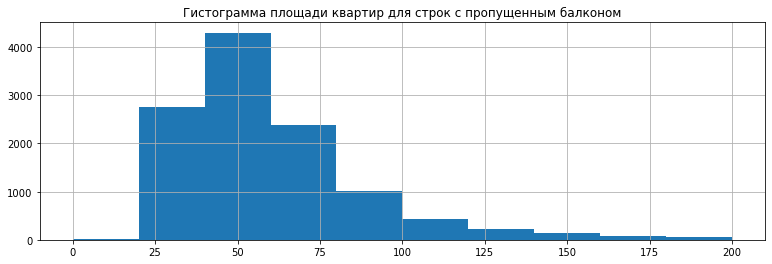

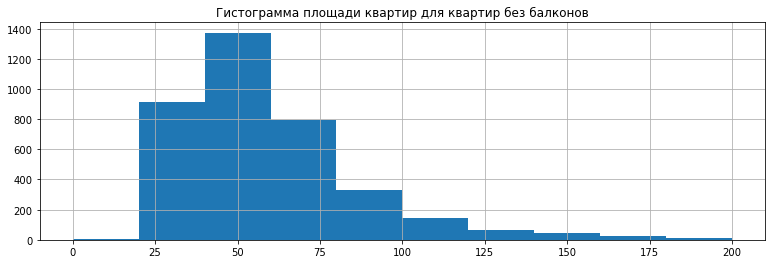

In [17]:
#заполним пробелы в столбце с балконами 
#посмотрим на число балконов по отношению к числу этажей и метров 
#Проверим гипотезу что балконы в основном отсутствуют на первых этажах, 
#либо в квартирах с малой площадью, до 40 м2
#data.loc[data['balcony'].isnull()][['total_area','floor']]
data.loc[data['balcony'].isnull()]['total_area'].hist(range=(0,200,),figsize=(13,4))
plt.title('Гистограмма площади квартир для строк с пропущенным балконом')
plt.show()
data.loc[data['balcony']==0]['total_area'].hist(range=(0,200),figsize=(13,4))
plt.title('Гистограмма площади квартир для квартир без балконов')
plt.show()

<i>Видим что гистограммы похожи, с пиком около 50 м2. </i>

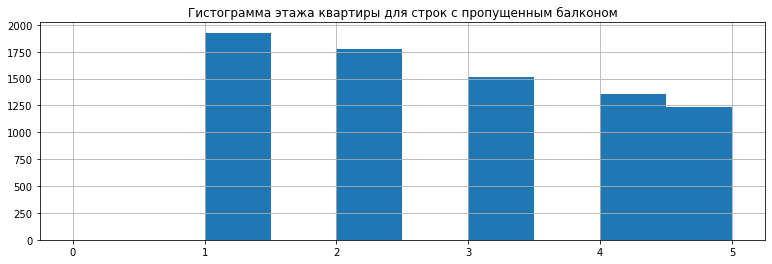

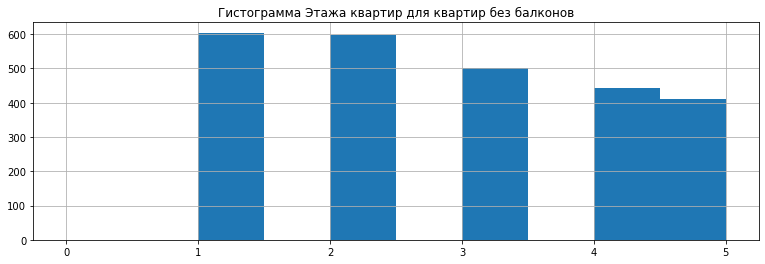

In [18]:
data.loc[data['balcony'].isnull()]['floor'].hist(range=(0,5),figsize=(13,4))
plt.title('Гистограмма этажа квартиры для строк с пропущенным балконом')
plt.show()
data.loc[(data['balcony']==0)]['floor'].hist(range=(0,5),figsize=(13,4))
plt.title('Гистограмма Этажа квартир для квартир без балконов')
plt.show()
#Видим что балконов может не быть и на 2м,3м,4м,5м этажах. Гипотеза не сработала


<i>Видим что балконов может не быть и на 2м,3м,4м,5м этажах. Гипотеза не сработала.Заменим пропуски нулями.</i>

In [19]:
#заменим пропуски нулями.
data['balcony'].fillna(0, inplace=True)
#проверим результат
print(data['balcony'].isnull().mean())

0.0


<i>Гипотеза о связи отсутствия/наличия балкона от 1го этажа и площади квартир до 30 м2 не оправдалась. Заменили пропуски в столбце 'balcony' на 0.<br>
Возможная причина пропуска - при заполнении анкет о квартире вместо нуля люди ставили прочерк, а системе обработки не прочитала это как "0"</i> 

In [20]:
#посмотрим колонку is_apartment
#Может апартаменты пропущены везде кроме Петербурга, т.е. в маленких городах
#этот параметр возможно просто не указывали, т.к. там нет апартаментов. Сравним
#Таблицы  с пропущенным параметром и весь датасет
print(data.loc[data['is_apartment'].isnull()]['locality_name'].value_counts())
print(data.loc[~data['is_apartment'].isnull()]['locality_name'].value_counts())

Санкт-Петербург                 13888
посёлок Мурино                    468
посёлок Шушары                    382
Всеволожск                        354
Пушкин                            321
                                ...  
поселок Коммунары                   1
посёлок Сумино                      1
деревня Тойворово                   1
городской посёлок Свирьстрой        1
деревня Шпаньково                   1
Name: locality_name, Length: 351, dtype: int64
Санкт-Петербург             1833
посёлок Шушары                58
посёлок Мурино                54
деревня Кудрово               48
Пушкин                        48
                            ... 
Каменногорск                   1
посёлок Сосново                1
деревня Иссад                  1
городской посёлок Рощино       1
деревня Малые Колпаны          1
Name: locality_name, Length: 140, dtype: int64


Видим что структура примерно одинаковая, т.е. логики пропусков нет.

In [21]:
#удалим эту колонку
data.drop('is_apartment', axis=1, inplace = True)
#Проверим результат
print(data.isnull().mean()) 
#колонка удалена

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.000000
locality_name           0.002068
airports_nearest        0.233850
city_centers_nearest    0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64


<i>Колонка is_apartment состоит из пропусков на 88%. <br>
Возможная причина пропуска - только одно подразделение или агентстсво недвижимости собирало этот параметр, другие не отслеживали. <br>
Колонку удалили, так как она неинформативна.</i>

In [22]:
#Поработаем с колонками parks_around3000 и parks_nearest 
#Проверим,если есть хотя бы один парк в радиусе 3км, будут ли пропуски в Parks_around? 
print(data[data['parks_around3000']>0].isnull().mean())

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.344644
floors_total            0.004211
living_area             0.071455
floor                   0.000000
studio                  0.000000
open_plan               0.000000
kitchen_area            0.085449
balcony                 0.000000
locality_name           0.001858
airports_nearest        0.002477
city_centers_nearest    0.000124
parks_around3000        0.000000
parks_nearest           0.000000
ponds_around3000        0.000000
ponds_nearest           0.403096
days_exposition         0.141796
dtype: float64


не будет. Значит NaN-валидное значение для пропуска

In [23]:
#Посмотрим, сколько пропусков в parks_nearest, при условии что колонка parks_around3000 пуста
print(data[data['parks_around3000'].isnull()].isnull().mean())


total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.466655
floors_total            0.001812
living_area             0.112903
floor                   0.000000
studio                  0.000000
open_plan               0.000000
kitchen_area            0.129576
balcony                 0.000000
locality_name           0.001450
airports_nearest        1.000000
city_centers_nearest    1.000000
parks_around3000        1.000000
parks_nearest           1.000000
ponds_around3000        1.000000
ponds_nearest           1.000000
days_exposition         0.156760
dtype: float64



Заменять 0 parks_nearest, если parks_around3000 пропущен, мы не можем, так как получится что квартира прямо в парке. 
Заменить пропущенные значения в самом parks_around3000 тоже не можем, так как у нас слишком большой город (Петербург) и мы можем исказить параметры, т.к. пропусков достаточно много, 25%.


<i>Выяснили, что колонки parks_around3000 и parks_nearest созависимы по пропускам.<br>
Возможные причины пропуска:<br>
1)информацию собирали разные агентства, и толкьо у части было ПО которое отслеживает ближайшие парки(т.к. мы знаем что эта информация заполнялась автоматически) <br>
Пропуски мы заполнять не стали, так как для Петербурга это будет нерелевантно (слишком большой город).<br>
Теоретически, можно заполнить пропуски для небольших городов-спутников Петербурга, испльзуя расстояние до центра.</i>

In [24]:
#Поработаем с колонками ponds_around3000   и ponds_nearest 
#data[['parks_around3000','parks_nearest']]
#Проверим,если есть хотя бы один пруд в радиусе 3км, будут ли пропуски в ponds_around? 
print(data[data['ponds_around3000']>0].isnull().mean())

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.370801
floors_total            0.005379
living_area             0.076290
floor                   0.000000
studio                  0.000000
open_plan               0.000000
kitchen_area            0.092645
balcony                 0.000000
locality_name           0.002744
airports_nearest        0.000878
city_centers_nearest    0.000000
parks_around3000        0.000000
parks_nearest           0.470472
ponds_around3000        0.000000
ponds_nearest           0.000000
days_exposition         0.133480
dtype: float64


не будет. Значит NaN-валидное значение для пропуска

Заменять на 0 ponds_nearest, если ponds_around3000 пропущен, мы не можем, так как получится 
что квартира прямо у пруда. 
заменить пропущенные значения в самом ponds_around3000 тоже не можем
, так как у нас слишком большой город (Петербург) и мы можем исказить параметры, т.к. пропусков 
достаточно много, 25%.

<i>Мы выяснили, что колонки ponds_around3000 и ponds_nearest созависимы по пропускам.<br>
Возможные причины пропуска:<br>
1)1)информацию собирали разные агентства, и толкьо у части было ПО которое отслеживает ближайшие парки(т.к. мы знаем что эта информация заполнялась автоматически) <br>
Пропуски мы заполнять не стали, так как для Петербурга это будет нерелевантно (слишком большой город).<br>
При необходимости, можно заполнить пропуски для маленьких городов-спутников Петербурга, испльзуя расстояние до центра.<br>
Также мы видим, что пропуска по parks_around3000,ponds_around3000 одинаковы по количеству. Значит пропуска в этих данных имеют одну природу.</i>


In [25]:
#Посмотирм на колонку с ближайшими аэропортами
print(data[data['airports_nearest'].isnull()].isnull().mean())

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.465175
floors_total            0.001804
living_area             0.112775
floor                   0.000000
studio                  0.000000
open_plan               0.000000
kitchen_area            0.129376
balcony                 0.000000
locality_name           0.001444
airports_nearest        1.000000
city_centers_nearest    0.995669
parks_around3000        0.995669
parks_nearest           0.996391
ponds_around3000        0.995669
ponds_nearest           0.998556
days_exposition         0.156442
dtype: float64


Видим что пропуски равны 100 в колонках parks и ponds. По той же причине, заменить мы их не сможем

<i>Из-за одинаковой структуры пропусков в колонках с ближайшими аэропортами,центро города, парками и прудами делаем вывод что это  может быть:<br>
1)Сбой системы автоматического заполнения<br>
2)Только часть организаций, агентств, собирающих данные, имела программную возомжнсоть привязывать объект к аэропорту, пруду и парку.У других ПО было устаревшее.</i>

In [26]:
#поработаем с колонкой days_exposition
#В ней 13 % пропусков. Если эта таблица собрана на определенную дату, тогда мы сможем восстановить 
#days_exposition, зная first_day_exposition, в котором пропусков нет
#проведем эксперимент со строками, где нет пропусков в days_exposition
display(data.head(5))

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  studio  ...  \
0            2.70          16.0         51.0      8   False  ...   
1             NaN          11.0         18.6      1   False  ...   
2             NaN           5.0         34.3      4   False  ...   
3             NaN          14.0          NaN      9   False  ...   
4            3.03          14.0         32.0     13   False  ...   

   kitchen_area  balcony    locality_name airports_nearest  \
0          25.0      0.0  Санкт-Петербург          18863.0   
1          11.0      2.0   посёлок Шушары          12817.0   
2           8.3      0.0  Санкт-Петербург          21741.0   
3           NaN      0.0  Санкт-Петербург          28098.0   
4          41.0      0.0  Санкт-Петербург          31856.0   

   city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0               16028.0               1.0          482.0               2.0   
1               18603.0               0.0            NaN               0.0   
2               13933.0               1.0           90.0               2.0   
3                6800.0               2.0           84.0               3.0   
4                8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  

[5 rows x 21 columns]

In [27]:
#подойдут строки №2,3,4 (т.е. с индексами 1,2,3)
print((data['first_day_exposition'][1])+(pd.Timedelta(days=(data['days_exposition'][1]))))
print((data['first_day_exposition'][2])+(pd.Timedelta(days=(data['days_exposition'][2]))))
print((data['first_day_exposition'][3])+(pd.Timedelta(days=(data['days_exposition'][3]))))


2019-02-23 00:00:00
2017-02-28 00:00:00
2016-09-20 00:00:00


Видим, что даты не совпадают, значит датасет составлен на разные даты. Возможно, квартиры не так давно вывешены, и поэтому не проданы.Тогда даты будут стремится к относительно свежим

In [28]:
print(data[data['days_exposition'].isnull()]['first_day_exposition'].sort_values().describe())

count                    3181
unique                    708
top       2019-04-22 00:00:00
freq                       46
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition, dtype: object


<ipython-input-28-f641114ec6c2>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



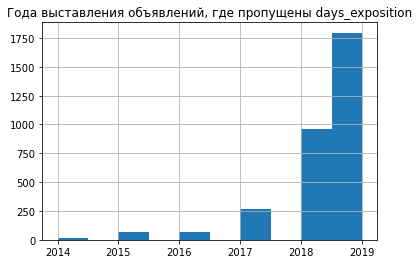

In [29]:

data[data['days_exposition'].isnull()]['first_day_exposition'].dt.year.hist()
plt.title('Года выставления объявлений, где пропущены days_exposition')
plt.show()

Видим что большинство объявлений от 2019 и 2018 годов. Возможно, эти квартиры не были проданы,а остальные пропуски - это ошибки в каком либо виде.

<i>Колонку 'days_exposition' мы заполнить не сможем. Возможно, это валидное значение, говорит о том что квартира еще продавалась на момент подачи объявления.</i>

In [30]:
#Много пропусков в стобце высота потолков ceiling_height .
#Посмотрим на таблицу где значения пропущены
display(data[data['ceiling_height'].isnull()].sort_values(by='total_area').sample(10))

total_images  last_price  total_area first_day_exposition  rooms  \
1060             10   5200000.0       50.00           2015-11-06      2   
15563             2   5955103.0       90.30           2017-09-07      3   
20415             2   5700000.0       49.98           2018-01-01      1   
4653             18   6700000.0       68.00           2019-04-01      3   
4094             12   5450000.0       57.60           2018-04-06      3   
20114             5   5700000.0       54.30           2019-01-02      2   
14246            14   6200000.0       86.20           2019-05-03      3   
2723              9   5300000.0       38.62           2018-11-29      1   
7335              4   4650000.0       54.00           2017-05-22      2   
12549            10  14500000.0      165.00           2017-02-02      6   

       ceiling_height  floors_total  living_area  floor  studio  ...  \
1060              NaN          35.0        39.00     15   False  ...   
15563             NaN          21.0        47.37     13   False  ...   
20415             NaN          14.0        15.60     10   False  ...   
4653              NaN           9.0        38.00      7   False  ...   
4094              NaN           9.0        39.40      3   False  ...   
20114             NaN          25.0        30.50     25   False  ...   
14246             NaN          10.0        49.50      7   False  ...   
2723              NaN          21.0          NaN      2   False  ...   
7335              NaN          24.0        30.00      1   False  ...   
12549             NaN           6.0       140.00      4   False  ...   

       kitchen_area  balcony    locality_name airports_nearest  \
1060          20.50      2.0  Санкт-Петербург          18732.0   
15563         16.89      1.0  Санкт-Петербург          25414.0   
20415         21.00      0.0  Санкт-Петербург          32781.0   
4653           9.50      1.0  Санкт-Петербург          13792.0   
4094           6.50      0.0  Санкт-Петербург          28632.0   
20114         12.18      0.0          Кудрово              NaN   
14246         17.00      0.0  деревня Куттузи              NaN   
2723          10.02      1.0  Санкт-Петербург          35935.0   
7335          10.00      0.0   посёлок Мурино              NaN   
12549         19.00      0.0  Санкт-Петербург          20561.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
1060                20444.0               0.0            NaN   
15563                6217.0               1.0          579.0   
20415                8684.0               0.0            NaN   
4653                16383.0               0.0            NaN   
4094                13261.0               0.0            NaN   
20114                   NaN               NaN            NaN   
14246                   NaN               NaN            NaN   
2723                 9508.0               0.0            NaN   
7335                    NaN               NaN            NaN   
12549                1827.0               3.0          427.0   

       ponds_around3000  ponds_nearest  days_exposition  
1060                3.0           80.0            281.0  
15563               1.0          743.0             15.0  
20415               0.0            NaN              3.0  
4653                0.0            NaN              NaN  
4094                1.0          544.0             23.0  
20114               NaN            NaN             60.0  
14246               NaN            NaN              NaN  
2723                1.0          136.0              7.0  
7335                NaN            NaN            521.0  
12549               3.0          251.0            180.0  

[10 rows x 21 columns]

<i>Видим что потолки пропущены в квартирах любых площадей, явной одной группы с пропущенными значениями не видно./i>

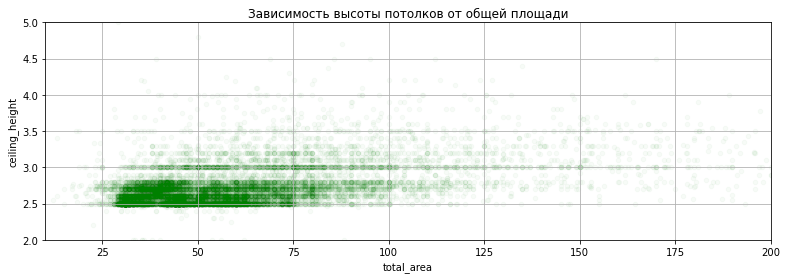

In [31]:
#Может высота потолков связан с какими-либо параметрами?Посмотрим зависимость высоты потолков от площади квартиры.
data[data['ceiling_height'].isnull()==False].plot( x='total_area',y='ceiling_height',kind='scatter', alpha=0.03, grid = True, color='green',figsize=(13,4))
plt.title('Зависимость высоты потолков от общей площади')
plt.xlim(10, 200)
plt.ylim(2, 5)
plt.show()

<i>Видим что в районе 75 м2 высота потолков стремится к более высокому значению, чем ранее.Используем 2 медианы для заполнения пропусков - до и после этой отметки. </i>

In [32]:
median_ceiling1=data.query('ceiling_height > 0 and total_area < =75')['ceiling_height'].median()
median_ceiling2=data.query('ceiling_height>0 and total_area >75')['ceiling_height'].median()
print(median_ceiling1,median_ceiling2)

2.6 2.9


Видим, что медианы отлечаются на 30 см.

In [33]:
data.loc[(data['total_area'] <=75)&(data['ceiling_height'].isnull()),'ceiling_height']=median_ceiling1
data.loc[(data['total_area'] >75)&(data['ceiling_height'].isnull()),'ceiling_height']=median_ceiling2

#проверим результат
print(data['ceiling_height'].isnull().mean())


0.0


<i>Заменили пропуски в высоте потолка на медианное, по друм группам: общей площадью квартиры до 75 м2 и более.</i>

In [34]:
#поработаем с living_area и kitchen_area
#В данном случае разумно будет заменить данные на процент от общей площади. 
#добавим этот столбец и посмотрим на него ов общем
#Добавим соотнешение жилой и общей площади, а также отношений площади кухни к общей
data['liv_tot_ar_ratio'] = data['living_area']/data['total_area']
data['kitchen_tot_ar_ratio'] = data['kitchen_area']/data['total_area']
#создадим вспомогательную таблицу, чтобы не засорять основную
data_2=data[(data['living_area'].isnull()==False)&(data['kitchen_area'].isnull()==False)].copy()
#Добавим столбец с округленной до десяток площадью
data_2['total_area']=data_2['total_area'].round(-1)
table1_liv=data_2.pivot_table(index='total_area', values='liv_tot_ar_ratio', aggfunc=['median'])
table2_kit=data_2.pivot_table(index='total_area', values='kitchen_tot_ar_ratio', aggfunc=['median'])

table1_liv.columns = ['liv_tot_ar_ratio']
table2_kit.columns = ['kitchen_tot_ar_ratio']

#преобразуем таблицы в словари
dict1=table1_liv.squeeze()
dict2=table2_kit.squeeze()
print(type(dict1))
print(type(dict2))


#проверим замену на простом массиве
dct= {10: 0.5, 20: 2, 30: 3,40:4, 50:5,60:6}
df = pd.DataFrame(
    {
        'a': [5, 4, 3, 2, 1],
        'total_area': [53, 14.8, 44, 37, 12],
        'b': [5, 4, 3, 2, 1],
        'c': ['X', 'Y', 'Y', 'Y', 'Z'],
    }
)
df['kitchen_area']=df['total_area'].round(-1).map(dct) * df['total_area']
df
#сработало


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


a  total_area  b  c  kitchen_area
0  5        53.0  5  X         265.0
1  4        14.8  4  Y           7.4
2  3        44.0  3  Y         176.0
3  2        37.0  2  Y         148.0
4  1        12.0  1  Z           6.0

In [35]:
#применим это к стобцам с пропусками в kitchen_area и total_area, но для строк 
#с площадью меньше 300 м2, так как после 300 м2 всего 61 квартира, следовательно деление
#по десяткам будет давать разбросы недостоверные
data.loc[(data['living_area'].isnull())&(data['total_area']<300),'living_area']=data.loc[data['living_area'].isnull(),'total_area'].round(-1).map(dict1) * data['total_area']
data.loc[(data['kitchen_area'].isnull())&(data['total_area']<300),'kitchen_area']=data.loc[data['kitchen_area'].isnull(),'total_area'].round(-1).map(dict2) * data['total_area']
data.isnull().mean()
#Посчитаем коэффициент как медиану для квартир от 300 до 400 м2, от 400 до 500, и более 500
median200living=data.loc[(data['total_area']>200)&(data['total_area']<=300),'liv_tot_ar_ratio'].median()
median300living=data.loc[(data['total_area']>300)&(data['total_area']<=400),'liv_tot_ar_ratio'].median()
median400living=data.loc[(data['total_area']>400)&(data['total_area']<=500),'liv_tot_ar_ratio'].median()
median500living=data.loc[data['total_area']>500,'liv_tot_ar_ratio'].median()
#Заменим пропуски для квартир с большими площадями
data.loc[(data['living_area'].isnull())&(data['total_area']>200)
&(data['total_area']<=300),'living_area']=data.loc[(data['living_area'].isnull())
&(data['total_area']>200)&(data['total_area']<=300)
,'total_area']*median200living

data.loc[(data['living_area'].isnull())&(data['total_area']>300)
&(data['total_area']<=400),'living_area']=data.loc[(data['living_area'].isnull())
&(data['total_area']>300)
&(data['total_area']<=400),'total_area']*median300living

data.loc[(data['living_area'].isnull())&(data['total_area']>400)&(data['total_area']<=500)
,'living_area']=data.loc[(data['living_area'].isnull())&(data['total_area']>400)
&(data['total_area']<=500),'total_area']*median400living

data.loc[(data['living_area'].isnull())&(data['total_area']>500)
,'living_area']=data.loc[(data['living_area'].isnull())
 &(data['total_area']>500),'total_area']*median500living


In [36]:
#сделаем тоже для кухни
median200kitchen=data.loc[(data['total_area']>200)&(data['total_area']<=300),'kitchen_tot_ar_ratio'].median()
median300kitchen=data.loc[(data['total_area']>300)&(data['total_area']<=400),'kitchen_tot_ar_ratio'].median()
median400kitchen=data.loc[(data['total_area']>400)&(data['total_area']<=500),'kitchen_tot_ar_ratio'].median()
median500kitchen=data.loc[data['total_area']>500,'kitchen_tot_ar_ratio'].median()

data.loc[(data['kitchen_area'].isnull())&(data['total_area']>200)
&(data['total_area']<=300),'kitchen_area']=data.loc[(data['kitchen_area'].isnull())
&(data['total_area']>200)&(data['total_area']<=300)
,'total_area']*median200kitchen

data.loc[(data['kitchen_area'].isnull())&(data['total_area']>300)
&(data['total_area']<=400),'kitchen_area']=data.loc[(data['kitchen_area'].isnull())
&(data['total_area']>300)
&(data['total_area']<=400),'total_area']*median300kitchen

data.loc[(data['kitchen_area'].isnull())&(data['total_area']>400)&(data['total_area']<=500)
,'kitchen_area']=data.loc[(data['kitchen_area'].isnull())&(data['total_area']>400)
&(data['total_area']<=500),'total_area']*median400kitchen

data.loc[(data['kitchen_area'].isnull())&(data['total_area']>500)
,'kitchen_area']=data.loc[(data['kitchen_area'].isnull())
 &(data['total_area']>500),'total_area']*median500kitchen

In [37]:
#проверим результат
print(data.isnull().mean())

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.000000
floors_total            0.003629
living_area             0.000000
floor                   0.000000
studio                  0.000000
open_plan               0.000000
kitchen_area            0.000000
balcony                 0.000000
locality_name           0.002068
airports_nearest        0.233850
city_centers_nearest    0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
liv_tot_ar_ratio        0.080299
kitchen_tot_ar_ratio    0.096122
dtype: float64


In [38]:
#Но есть проуски в liv_tot_ar_ratio и kitchen_tot_ar_ratio, так как ранее эти метрики считались для пропущенных значений    
data.loc[data['liv_tot_ar_ratio'].isnull(),'liv_tot_ar_ratio'] = data.loc[data['liv_tot_ar_ratio'].isnull()
,'living_area']/data.loc[data['liv_tot_ar_ratio'].isnull(),'total_area']
data.loc[data['kitchen_tot_ar_ratio'].isnull(),'kitchen_tot_ar_ratio'] = data.loc[data['kitchen_tot_ar_ratio'].isnull()
,'kitchen_area']/data.loc[data['kitchen_tot_ar_ratio'].isnull(),'total_area']
print(data.isnull().mean())

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.000000
floors_total            0.003629
living_area             0.000000
floor                   0.000000
studio                  0.000000
open_plan               0.000000
kitchen_area            0.000000
balcony                 0.000000
locality_name           0.002068
airports_nearest        0.233850
city_centers_nearest    0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
liv_tot_ar_ratio        0.000000
kitchen_tot_ar_ratio    0.000000
dtype: float64


Все пропуски заполнены

<i>Заменили прпоуски в living_area  и kitchen_area. Пропусков мало, меньше 10%, потому возможная причина  - не успели, забыли померить, т.е. человеческий фактор</i>

In [39]:
data.isnull().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.000000
floors_total            0.003629
living_area             0.000000
floor                   0.000000
studio                  0.000000
open_plan               0.000000
kitchen_area            0.000000
balcony                 0.000000
locality_name           0.002068
airports_nearest        0.233850
city_centers_nearest    0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
liv_tot_ar_ratio        0.000000
kitchen_tot_ar_ratio    0.000000
dtype: float64

<i>Помимо изученных и обработанных колонок, остется маленький процент пропусков в `floors_total` - 0.36%  и `locality_name` - 0,2%. Оставим их без изменений, так как заполнить их мы не сможем, сами данные нам не сильно пригодятся, но другие параметры строк с этими пропусками нам будут нужны</i>

### Обработка дубликатов

In [40]:
#посмотрим количество строк дубликатов
print(data.duplicated().sum())
print(data.shape)

0
(23699, 23)


<i>Полных дубликатов не оказалось.<br>
Возможны неявные дубликаты, мы видим их может быть около 300 штук. Они могли возникнуть по причине:<br>
1)Клиент несколько раз регистрировал квартиру, в разных сервисах.С немного разными параметрами(например загрузил один раз 5 фотографий, в другой 7). А Яндекс Недвижимость потом собрала их вместе как разные объекты<br>
2)Клиент находил покупателя, снимал объявление о продаже. Сделка срывалась, он ставил его еще раз. По каким то причинам система видела их как разные объекты.<br>
Но также возможно что это разные объекты, так как люди покупают несколько одинаковых квартир в подъезде и продают.Тогда параметры могут совпадать. <br>
По этой причине, неявные дубликаты удалять не будем.</i>

## Расчёты и добавление результатов в таблицу

In [41]:
#добавим столбец с ценой квадратного метра и округлим до целых
data['m2_price']=(data['last_price']/data['total_area']).round()
display(data.sample(10))

total_images  last_price  total_area first_day_exposition  rooms  \
18868             2   3990000.0        38.0           2017-11-07      1   
9840             10   4150000.0        50.7           2018-06-25      2   
12858             7   1990000.0        30.0           2015-06-23      1   
2080             11   4900000.0        66.0           2017-02-07      3   
12782            20   5200000.0        57.5           2017-07-17      2   
7854             16   4700000.0        42.0           2017-07-21      2   
18711             7    730000.0        36.0           2019-03-21      1   
17074            10   5300000.0        55.0           2016-03-24      2   
14068             4   1980000.0        40.0           2016-04-19      1   
4136              4   5200140.0        51.1           2018-07-30      2   

       ceiling_height  floors_total  living_area  floor  studio  ...  \
18868             2.6           9.0        19.00      5   False  ...   
9840              2.5          10.0        32.00     10   False  ...   
12858             2.6           3.0        13.00      2   False  ...   
2080              2.6           9.0        42.00      2   False  ...   
12782             2.5           9.0        35.50      9   False  ...   
7854              2.5           7.0        24.50      6   False  ...   
18711             2.7           5.0        17.50      1   False  ...   
17074             2.8           5.0        40.00      5   False  ...   
14068             2.6           9.0        17.00      1   False  ...   
4136              2.6          25.0        27.43     16   False  ...   

       airports_nearest  city_centers_nearest  parks_around3000 parks_nearest  \
18868           19180.0               12874.0               0.0           NaN   
9840                NaN                   NaN               NaN           NaN   
12858               NaN                   NaN               NaN           NaN   
2080            19693.0               13494.0               0.0           NaN   
12782           45909.0               18633.0               0.0           NaN   
7854            41851.0               12033.0               0.0           NaN   
18711               NaN                   NaN               NaN           NaN   
17074           24331.0                3872.0               1.0         655.0   
14068               NaN                   NaN               NaN           NaN   
4136                NaN                   NaN               NaN           NaN   

       ponds_around3000  ponds_nearest  days_exposition  liv_tot_ar_ratio  \
18868               0.0            NaN            406.0          0.500000   
9840                NaN            NaN            202.0          0.631164   
12858               NaN            NaN              NaN          0.433333   
2080                0.0            NaN             42.0          0.636364   
12782               0.0            NaN            421.0          0.617391   
7854                0.0            NaN             76.0          0.583333   
18711               NaN            NaN              NaN          0.486111   
17074               0.0            NaN            704.0          0.727273   
14068               NaN            NaN            142.0          0.425000   
4136                NaN            NaN             49.0          0.536791   

       kitchen_tot_ar_ratio  m2_price  
18868              0.236842  105000.0  
9840               0.177515   81854.0  
12858              0.300000   66333.0  
2080               0.156061   74242.0  
12782              0.161739   90435.0  
7854               0.142857  111905.0  
18711              0.250000   20278.0  
17074              0.127273   96364.0  
14068              0.200000   49500.0  
4136               0.220352  101764.0  

[10 rows x 24 columns]

In [42]:
##### добавим столбец с днем недели, месяцем и годом публикации объявления
#Сразу ушли секунды, часы и минуты. Но они нам и не нужны.Почему это случается? 
#Проверили в черновике - это случается когда время идет 00:00:00 Если бы время было хотя бы 00:01:00 оно бы отобразилось
#data.dtypes
#'first_day_exposition' стал datetime64[ns]
data['weekday_publication'] = data['first_day_exposition'].dt.weekday
data['month_publication'] = data['first_day_exposition'].dt.month
data['year_publication'] = data['first_day_exposition'].dt.year
#display(data.head(10)) все в порядке


In [43]:
#Добавим столбец с этажом квартиры
def floor_cat(row):
    floor = row['floor']
    floors_total = row['floors_total']

    if floor==floors_total:
        return 'последний'
    if floor==1:
        return 'первый'
    else:
        return 'другой'
    

#проверим функцию на простом массиве
#row_values = [15, 15] 
#row_columns = ['floor', 'floors_total']
#row = pd.Series(data=row_values, index=row_columns) 
#print(floor_cat(row))
#Код работает.Применим функцию к датасету
    
data['floor_cat']=data.apply(floor_cat, axis =1)
display(data.head(10))

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00           2019-03-07      3   
1             7   3350000.0       40.40           2018-12-04      1   
2            10   5196000.0       56.00           2015-08-20      2   
3             0  64900000.0      159.00           2015-07-24      3   
4             2  10000000.0      100.00           2018-06-19      2   
5            10   2890000.0       30.40           2018-09-10      1   
6             6   3700000.0       37.30           2017-11-02      1   
7             5   7915000.0       71.60           2019-04-18      2   
8            20   2900000.0       33.16           2018-05-23      1   
9            18   5400000.0       61.00           2017-02-26      3   

   ceiling_height  floors_total  living_area  floor  studio  ...  \
0            2.70          16.0    51.000000      8   False  ...   
1            2.60          11.0    18.600000      1   False  ...   
2            2.60           5.0    34.300000      4   False  ...   
3            2.90          14.0    99.019440      9   False  ...   
4            3.03          14.0    32.000000     13   False  ...   
5            2.60          12.0    14.400000      5   False  ...   
6            2.60          26.0    10.600000      6   False  ...   
7            2.60          24.0    43.071268     22   False  ...   
8            2.60          27.0    15.430000     26   False  ...   
9            2.50           9.0    43.600000      7   False  ...   

   ponds_around3000  ponds_nearest  days_exposition liv_tot_ar_ratio  \
0               2.0          755.0              NaN         0.472222   
1               0.0            NaN             81.0         0.460396   
2               2.0          574.0            558.0         0.612500   
3               3.0          234.0            424.0         0.622764   
4               1.0           48.0            121.0         0.320000   
5               NaN            NaN             55.0         0.473684   
6               0.0            NaN            155.0         0.284182   
7               0.0            NaN              NaN         0.601554   
8               NaN            NaN            189.0         0.465320   
9               0.0            NaN            289.0         0.714754   

   kitchen_tot_ar_ratio  m2_price  weekday_publication  month_publication  \
0              0.231481  120370.0                    3                  3   
1              0.272277   82921.0                    1                 12   
2              0.148214   92786.0                    3                  8   
3              0.126907  408176.0                    4                  7   
4              0.410000  100000.0                    1                  6   
5              0.299342   95066.0                    0                  9   
6              0.386059   99196.0                    3                 11   
7              0.263966  110545.0                    3                  4   
8              0.265682   87455.0                    2                  5   
9              0.106557   88525.0                    6                  2   

   year_publication  floor_cat  
0              2019     другой  
1              2018     первый  
2              2015     другой  
3              2015     другой  
4              2018     другой  
5              2018     другой  
6              2017     другой  
7              2019     другой  
8              2018     другой  
9              2017     другой  

[10 rows x 28 columns]

In [44]:
#Проверим, нет ли квартир с этажом выше максимального

data.loc[data['floor']>data['floors_total']]

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, liv_tot_ar_ratio, kitchen_tot_ar_ratio, m2_price, weekday_publication, month_publication, year_publication, floor_cat]
Index: []

[0 rows x 28 columns]

<i>Этажей выше максимального нет</i>

In [45]:
#Столбец отношения жилой к общей площади и площади  кухни к общей мы добавили ранее, при обработке пропусков
display(data.head(10))
data.info()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00           2019-03-07      3   
1             7   3350000.0       40.40           2018-12-04      1   
2            10   5196000.0       56.00           2015-08-20      2   
3             0  64900000.0      159.00           2015-07-24      3   
4             2  10000000.0      100.00           2018-06-19      2   
5            10   2890000.0       30.40           2018-09-10      1   
6             6   3700000.0       37.30           2017-11-02      1   
7             5   7915000.0       71.60           2019-04-18      2   
8            20   2900000.0       33.16           2018-05-23      1   
9            18   5400000.0       61.00           2017-02-26      3   

   ceiling_height  floors_total  living_area  floor  studio  ...  \
0            2.70          16.0    51.000000      8   False  ...   
1            2.60          11.0    18.600000      1   False  ...   
2            2.60           5.0    34.300000      4   False  ...   
3            2.90          14.0    99.019440      9   False  ...   
4            3.03          14.0    32.000000     13   False  ...   
5            2.60          12.0    14.400000      5   False  ...   
6            2.60          26.0    10.600000      6   False  ...   
7            2.60          24.0    43.071268     22   False  ...   
8            2.60          27.0    15.430000     26   False  ...   
9            2.50           9.0    43.600000      7   False  ...   

   ponds_around3000  ponds_nearest  days_exposition liv_tot_ar_ratio  \
0               2.0          755.0              NaN         0.472222   
1               0.0            NaN             81.0         0.460396   
2               2.0          574.0            558.0         0.612500   
3               3.0          234.0            424.0         0.622764   
4               1.0           48.0            121.0         0.320000   
5               NaN            NaN             55.0         0.473684   
6               0.0            NaN            155.0         0.284182   
7               0.0            NaN              NaN         0.601554   
8               NaN            NaN            189.0         0.465320   
9               0.0            NaN            289.0         0.714754   

   kitchen_tot_ar_ratio  m2_price  weekday_publication  month_publication  \
0              0.231481  120370.0                    3                  3   
1              0.272277   82921.0                    1                 12   
2              0.148214   92786.0                    3                  8   
3              0.126907  408176.0                    4                  7   
4              0.410000  100000.0                    1                  6   
5              0.299342   95066.0                    0                  9   
6              0.386059   99196.0                    3                 11   
7              0.263966  110545.0                    3                  4   
8              0.265682   87455.0                    2                  5   
9              0.106557   88525.0                    6                  2   

   year_publication  floor_cat  
0              2019     другой  
1              2018     первый  
2              2015     другой  
3              2015     другой  
4              2018     другой  
5              2018     другой  
6              2017     другой  
7              2019     другой  
8              2018     другой  
9              2017     другой  

[10 rows x 28 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   studio                23699 non-null  bool          
 10  open_plan             23699 non-null  bool          
 11  kitchen_area          23699 non-null  float64       
 12  balcony               23699 non-null  float64       
 13  locality_name   

## Исследовательский анализ данных

### Площадь, цена, число комнат, высота потолков


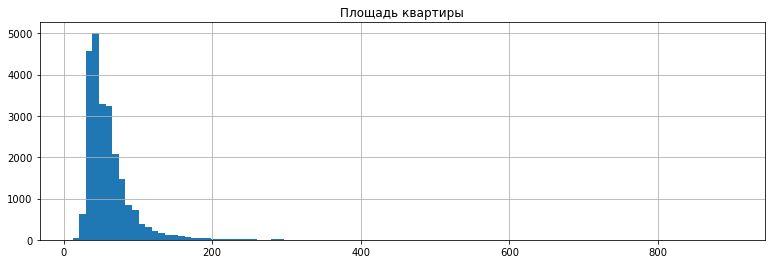

In [46]:
#построим гистограмму по площадти
data['total_area'].hist(bins = 100,figsize=(13,4))
plt.title('Площадь квартиры')
plt.show()

<i>Гистограмма выглядит правдоподобно</i>

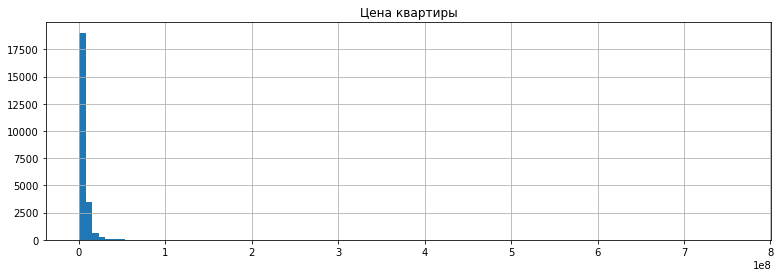

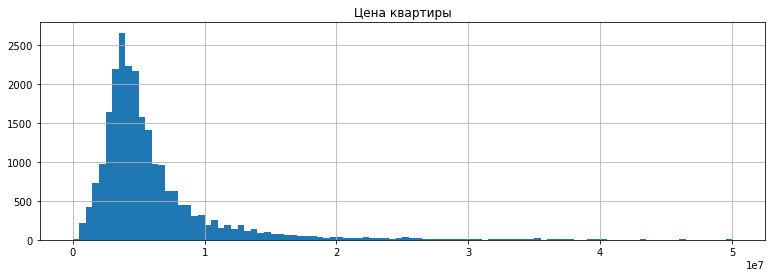

In [47]:
data['last_price'].hist(bins = 100,figsize=(13,4))
plt.title('Цена квартиры')
plt.show()
#Ничего не видно, можно сузить диапазон
data['last_price'].hist(bins = 100,figsize=(13,4),range = (0,50000000))
plt.title('Цена квартиры')
plt.show()

<i>Видим часть значений около нуля, они явно ошибочные.</i>

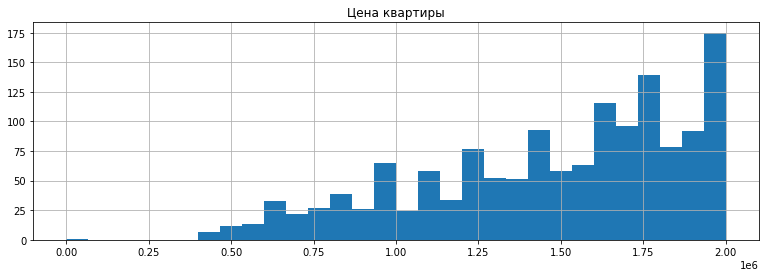

In [48]:
#Посмотрим поближе
data['last_price'].hist(bins = 30,figsize=(13,4),range = (0,2000000))
plt.title('Цена квартиры')
plt.show()

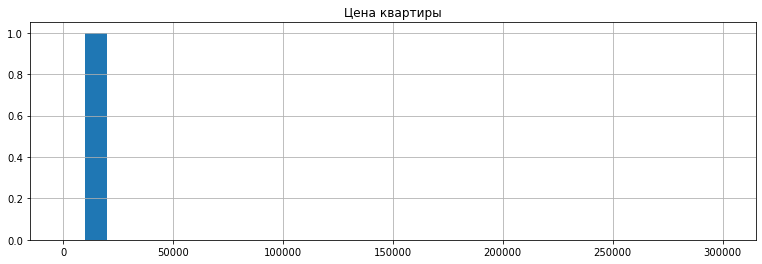

In [49]:
#видим что есть несколько квартир с ценой около 0.Посмотрим поближе
data['last_price'].hist(bins = 30,figsize=(13,4),range = (0,300000))
plt.title('Цена квартиры')
plt.show()


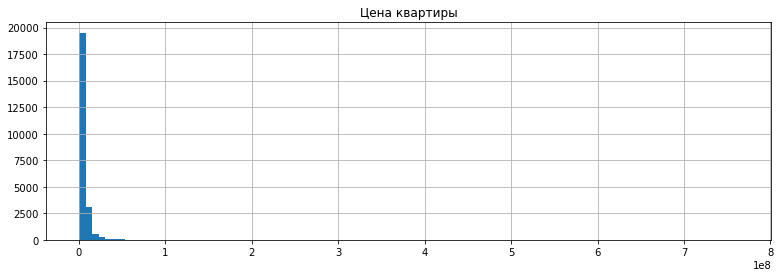

In [50]:
#Такая квартира 1.Посмотрим ее параметры
data.loc[data['last_price']==data['last_price'].min()]
#построим гистограмму без этой квартиры.
data.query('last_price>12190')['last_price'].hist(bins = 100,figsize=(13,4))
plt.title('Цена квартиры')
plt.show()
#Видим что гистограмма сместилась вправо. Распределение экспоненциальное, но очень резкое

<i>1)В гистограмме распределения last_price одно значение принадлежит квартире в 109 м2 ценой в 12 190 рублей.Это подозрительно, возможна ошибка.<br>
2)После того как мы убрали выброс около 0, диаграмма стала напоминать нормальное распределение.Но нужно смотреть цену за м2, так как общая цена -слишком размытая метрика безотносительно других параметров.</i>

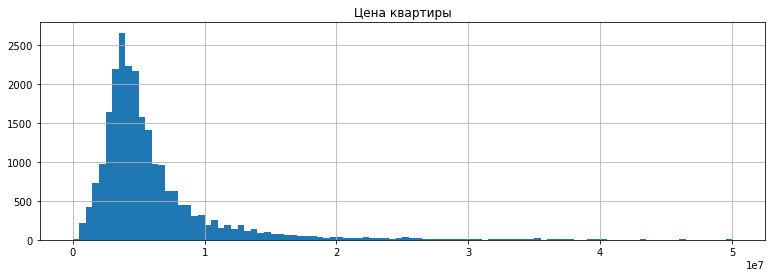

In [51]:
#после цены в 50 миллионов у нас квартир очнеь мало.Посмотрим гистограмму до 50 000 000
data.query('last_price>12190')['last_price'].hist(bins = 100,figsize=(13,4),range = (0,50000000))
plt.title('Цена квартиры')
plt.show()

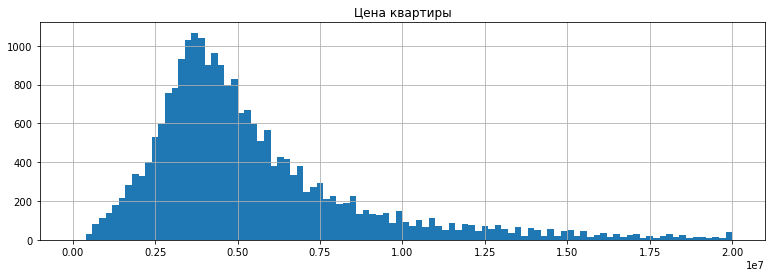

In [52]:
#после цены в 20 миллионов у нас длинный хваост.Сузим еще диапазон
data.query('last_price>12190')['last_price'].hist(bins = 100,figsize=(13,4),range = (0,20000000))
plt.title('Цена квартиры')
plt.show()

In [53]:
#Изучим хвост гистограммы. Может, среди экстремальных значений есть ошибка? 
data.query('last_price>200000000')

total_images   last_price  total_area first_day_exposition  rooms  \
1436             19  330000000.0       190.0           2018-04-04      3   
5893              3  230000000.0       500.0           2017-05-31      6   
12971            19  763000000.0       400.0           2017-09-30      7   
13749             7  240000000.0       410.0           2017-04-01      6   
14706            15  401300000.0       401.0           2016-02-20      5   
15651            20  300000000.0       618.0           2017-12-18      7   
16461            17  245000000.0       285.7           2017-04-10      6   
19540             8  420000000.0       900.0           2017-12-06     12   
22831            18  289238400.0       187.5           2019-03-19      2   

       ceiling_height  floors_total  living_area  floor  studio  ...  \
1436             3.50           7.0    95.000000      5   False  ...   
5893             2.90           7.0   265.853659      7   False  ...   
12971            2.90          10.0   250.000000     10   False  ...   
13749            3.40           7.0   218.000000      7   False  ...   
14706            2.90           9.0   204.000000      9   False  ...   
15651            3.40           7.0   258.000000      5   False  ...   
16461            3.35           7.0   182.800000      4   False  ...   
19540            2.80          25.0   409.700000     25   False  ...   
22831            3.37           6.0    63.700000      6   False  ...   

       ponds_around3000  ponds_nearest  days_exposition liv_tot_ar_ratio  \
1436                3.0          285.0            233.0         0.500000   
5893                2.0          198.0             50.0         0.531707   
12971               3.0          756.0             33.0         0.625000   
13749               2.0          198.0            199.0         0.531707   
14706               1.0          478.0            393.0         0.508728   
15651               2.0          198.0            111.0         0.417476   
16461               3.0          140.0            249.0         0.639832   
19540               2.0          318.0            106.0         0.455222   
22831               3.0          188.0              NaN         0.339733   

       kitchen_tot_ar_ratio   m2_price  weekday_publication  \
1436               0.210526  1736842.0                    2   
5893               0.080000   460000.0                    2   
12971              0.087443  1907500.0                    5   
13749              0.097561   585366.0                    5   
14706              0.059850  1000748.0                    5   
15651              0.113269   485437.0                    0   
16461              0.104305   857543.0                    0   
19540              0.124444   466667.0                    2   
22831              0.161067  1542605.0                    1   

       month_publication  year_publication  floor_cat  
1436                   4              2018     другой  
5893                   5              2017  последний  
12971                  9              2017  последний  
13749                  4              2017  последний  
14706                  2              2016  последний  
15651                 12              2017     другой  
16461                  4              2017     другой  
19540                 12              2017  последний  
22831                  3              2019  последний  

[9 rows x 28 columns]

<i>У квартир с ценой больше 200 млн площадь свыше 187,5 м2 до 900 м2, т.е. квартиры элитные. Вполне возможно, с учетом разброса цен на элитное жилье в крупных городах</i>

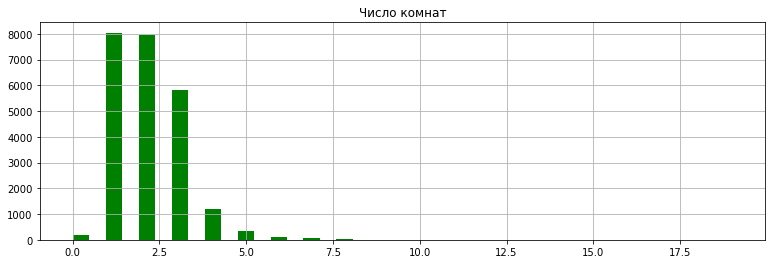

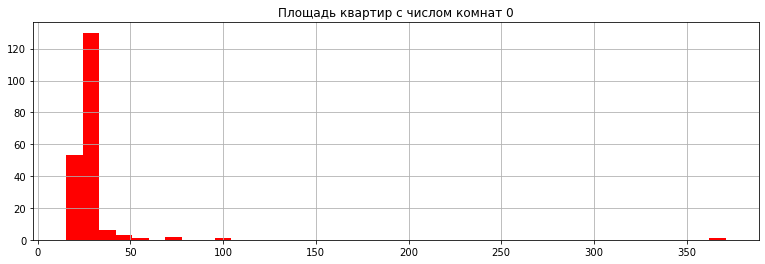

In [54]:
#построим гистограмму по числу комнат
data['rooms'].hist(bins = 40,figsize=(13,4), color="green")
plt.title('Число комнат')
plt.show()
#Видим что есть квартиры с числом комнат "0"
data.loc[data['rooms']==0]
#Таких строк 195
data.loc[data['rooms']==0,'total_area'].hist(bins = 40,figsize=(13,4), color="red")
plt.title('Площадь квартир с числом комнат 0')
plt.show()

<i>Видим что в основном это маленкие квартиры.Заменим число комнат на медианное по общей площади.>

36.56 53.0 73.0 99.3


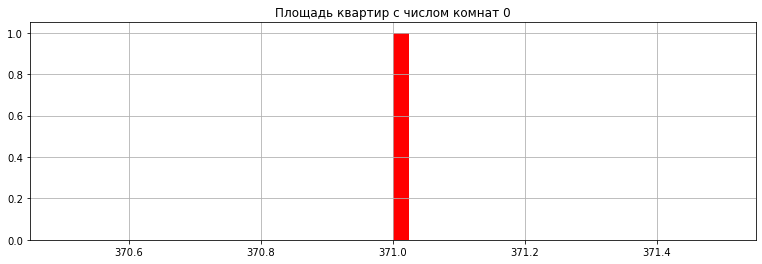

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, liv_tot_ar_ratio, kitchen_tot_ar_ratio, m2_price, weekday_publication, month_publication, year_publication, floor_cat]
Index: []

[0 rows x 28 columns]

In [55]:
#Посмотрим медианную площадь по количеству комнат
rooms_data=data.pivot_table(index='rooms', values='total_area',aggfunc='median')

median1_ttl_area=data.groupby('rooms')['total_area'].agg('median')[1]
median2_ttl_area=data.groupby('rooms')['total_area'].agg('median')[2]
median3_ttl_area=data.groupby('rooms')['total_area'].agg('median')[3]
median4_ttl_area=data.groupby('rooms')['total_area'].agg('median')[4]
median5_ttl_area=data.groupby('rooms')['total_area'].agg('median')[5]
print(median1_ttl_area,median2_ttl_area,median3_ttl_area,median4_ttl_area)

#Заменим нули в числе комнат

data.loc[(data['rooms']==0)&(data['total_area']<=median1_ttl_area),'rooms']=1
data.loc[(data['rooms']==0)&(data['total_area']>median1_ttl_area)
&(data['total_area']<=median2_ttl_area),'rooms']=2
data.loc[(data['rooms']==0)&(data['total_area']>median2_ttl_area)
&(data['total_area']<=median3_ttl_area),'rooms']=3
data.loc[(data['rooms']==0)&(data['total_area']>median3_ttl_area)
&(data['total_area']<=median4_ttl_area),'rooms']=4
data.loc[(data['rooms']==0)&(data['total_area']>median4_ttl_area)
&(data['total_area']<=median5_ttl_area),'rooms']=5
#проверим результат
data.loc[data['rooms']==0,'total_area'].hist(bins = 40,figsize=(13,4), color="red")
plt.title('Площадь квартир с числом комнат 0')
plt.show()
#Остается одна такая квартира. Посмотрим соседние варианты
data.loc[(data['total_area']>340)&(data['total_area']<400)]
#Таких вариантов 18, число комнат от 3 до 19. Заменим на медиану
data.loc[(data['rooms']==0),'rooms']=data.loc[(data['total_area']>340)&(data['total_area']<400),'rooms'].median()
#проверим результат
data.loc[data['rooms']==0]
#таких квартир не осталось

In [56]:
# КОД РЕВЬЮЕРА

data.groupby('rooms')['total_area'].agg('median')

rooms
1      36.30
2      53.00
3      72.95
4      99.05
5     146.45
6     184.30
7     215.50
8     235.70
9     300.95
10    272.60
11    188.90
12    900.00
14    304.20
15    590.00
16    270.00
19    374.60
Name: total_area, dtype: float64

<i>Заменили 0 в квартирах с числом конмат "0" на число комнат квартир с аналогичной площадью.</i>

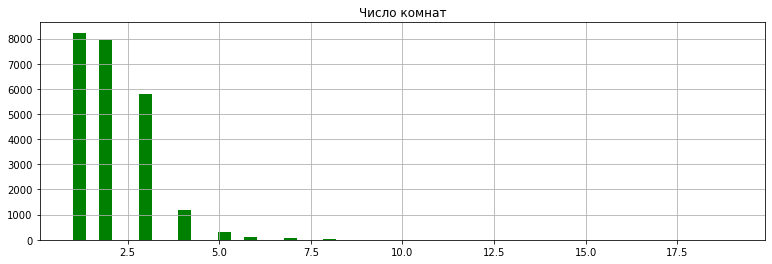

In [57]:
#построим гистограмму по числу комнат еще раз
data['rooms'].hist(bins = 50,figsize=(13,4), color="green")
plt.title('Число комнат')
plt.show()

<i>Теперь распределение кажется естественным: большинство квартир продается с числом комнат 1,2, 3 чуть ниже, и дальше резкий скачок вниз</i>

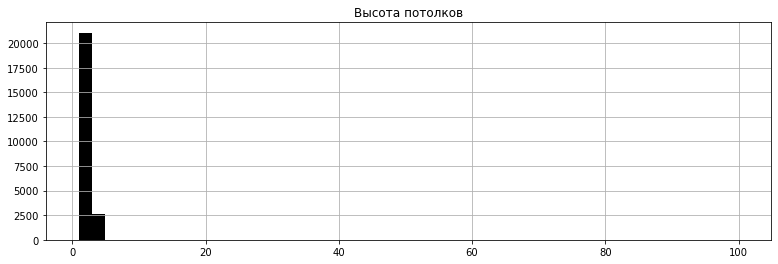

In [58]:
#построим гистограмму по высоте потолков
data['ceiling_height'].hist(figsize=(13,4),color='black',bins=50)
plt.title('Высота потолков')
plt.show()

Есть значения правее 5, надо разобраться

In [59]:
data.loc[data['ceiling_height']>5].sort_values(by='ceiling_height')
#таких значений у нас 36. 

total_images   last_price  total_area first_day_exposition  rooms  \
464              15   66571000.0       280.3           2015-06-11      6   
12628            14    3900000.0        50.0           2018-03-29      1   
1026             20  155000000.0       310.0           2018-10-12      5   
7578             17   38000000.0       143.0           2017-11-02      3   
1388             20   59800000.0       399.0           2015-01-21      5   
21227             0    8200000.0        71.0           2017-07-21      3   
20264            17  119000000.0       187.6           2017-07-10      4   
17442             0    5350000.0        54.0           2015-06-16      2   
15743            14    5600000.0        67.0           2016-11-11      3   
3474              3    1400000.0        30.0           2018-03-16      1   
5863             20    5650000.0        45.0           2018-08-15      1   
22309            20    5300000.0        45.0           2017-09-30      1   
15061            19    5600000.0        56.4           2018-05-11      2   
17496            15    6700000.0        92.9           2019-02-19      3   
20507            12    5950000.0        60.0           2018-02-19      2   
5076              0    3850000.0        30.5           2018-10-03      1   
14382             9    1700000.0        35.0           2015-12-04      1   
18545             6    3750000.0        43.0           2019-03-18      2   
355              17    3600000.0        55.2           2018-07-12      2   
11285             0    1950000.0        37.0           2019-03-20      1   
9379              5    3950000.0        42.0           2017-03-26      3   
6246              6    3300000.0        44.4           2019-03-25      2   
4643              0    4300000.0        45.0           2018-02-01      2   
5669              4    4400000.0        50.0           2017-08-08      2   
10773             8    3800000.0        58.0           2017-10-13      2   
5807             17    8150000.0        80.0           2019-01-09      2   
17857             1    3900000.0        56.0           2017-12-22      3   
5246              0    2500000.0        54.0           2017-10-13      2   
20478            11    8000000.0        45.0           2017-07-18      1   
4876              7    3000000.0        25.0           2017-09-27      1   
21824            20    2450000.0        44.0           2019-02-12      2   
22938            14    4000000.0        98.0           2018-03-15      4   
21377            19    4900000.0        42.0           2017-04-18      1   
3148             14    2900000.0        75.0           2018-11-12      3   
22336            19    9999000.0        92.4           2019-04-05      2   
22869             0   15000000.0        25.0           2018-07-25      1   

       ceiling_height  floors_total  living_area  floor  studio  ...  \
464               5.2           8.0   159.500000      7   False  ...   
12628             5.3           5.0    29.545455      5   False  ...   
1026              5.3           3.0   190.000000      3   False  ...   
7578              5.5           5.0    83.000000      5   False  ...   
1388              5.6           6.0   236.906250      6   False  ...   
21227             5.8           5.0    68.000000      5    True  ...   
20264             6.0           7.0   147.000000      7   False  ...   
17442             8.0           5.0    29.000000      2   False  ...   
15743             8.0          16.0    41.000000      1   False  ...   
3474              8.0           5.0    15.300000      2   False  ...   
5863              8.3          16.0    19.300000     14   False  ...   
22309            10.3          16.0    15.500000     15   False  ...   
15061            14.0          14.0    32.400000      5   False  ...   
17496            20.0          17.0    53.200000     14   False  ...   
20507            22.6          14.0    35.000000     11   False  ...   
5076             24.0           5.0    19.

<i>Сначала значения высоких потолков идут для элитных квартир, затем идут площади обычных квартир где высота потолков неправдоподобная. Примем высоту потолков выше 6 метрво как неправдоподобную </i>

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, liv_tot_ar_ratio, kitchen_tot_ar_ratio, m2_price, weekday_publication, month_publication, year_publication, floor_cat]
Index: []

[0 rows x 28 columns]


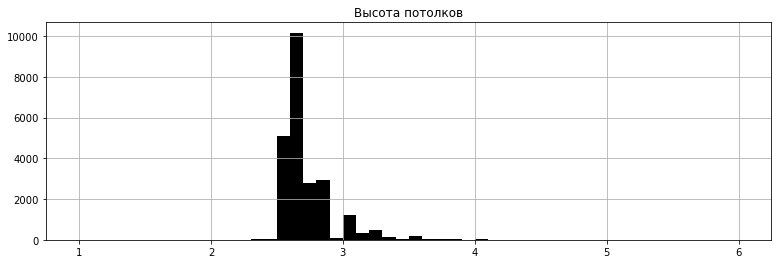

In [60]:
#заменим выбивающиеся значения на медианные
data.loc[data['ceiling_height']>6,'ceiling_height']=median_ceiling1
#проверим результат
print(data.loc[data['ceiling_height']>6].sort_values(by='ceiling_height'))
#Таких значений не осталось
data['ceiling_height'].hist(figsize=(13,4),color='black',bins=50)
plt.title('Высота потолков')
plt.show()


<i>Теперь видим что у нас есть значения меньше 2х метров. Посмотрим на них</i>

In [61]:
display(data.loc[data['ceiling_height']<2.3].sort_values(by='ceiling_height'))
#У этих квартир площади не минимальные, поэтому предположим ошибку и заменим данные
data.loc[data['ceiling_height']<2.3,'ceiling_height']=median_ceiling1
#проверим результат
display(data.loc[data['ceiling_height']<2.3].sort_values(by='ceiling_height'))
#Все в порядке

total_images  last_price  total_area first_day_exposition  rooms  \
22590            16   6000000.0       55.00           2018-10-31      2   
5712              5   1500000.0       42.80           2017-08-14      2   
16934             5   4100000.0       40.00           2017-10-17      1   
552              11   2999000.0       33.50           2017-03-30      1   
2572              4   2400000.0       62.00           2018-12-27      3   
4212              1   2120000.0       35.43           2017-12-18      1   
5850              9   1650000.0       35.50           2018-05-29      1   
11352             4   3300000.0       36.00           2017-06-18      1   
16446             6  12300000.0       88.30           2019-03-12      3   
16884             0   1500000.0       33.00           2018-10-03      1   
19098             7   2700000.0       56.00           2018-02-04      3   
19329             5   1700000.0       40.00           2018-07-15      2   
20520             9   3600000.0       38.00           2018-07-05      1   
22960            17   2300000.0       53.60           2018-10-18      2   
12755             2   1400000.0       22.50           2017-09-21      1   
17794             1   2300000.0       58.60           2016-05-12      3   

       ceiling_height  floors_total  living_area  floor  studio  ...  \
22590            1.00          12.0    32.400000      7   False  ...   
5712             1.20           2.0    27.500000      1   False  ...   
16934            1.75          37.0    17.400000      5   False  ...   
552              2.00          15.0    17.500000      6   False  ...   
2572             2.00           5.0    40.000000      4   False  ...   
4212             2.00          18.0    16.600000      9   False  ...   
5850             2.00           5.0    17.270270      5   False  ...   
11352            2.00          17.0    15.200000     12   False  ...   
16446            2.00           5.0    63.900000      2   False  ...   
16884            2.00           5.0    20.000000      5   False  ...   
19098            2.00           5.0    46.000000      1   False  ...   
19329            2.00           9.0    19.459459      8   False  ...   
20520            2.00          12.0    15.000000      9   False  ...   
22960            2.00           2.0    19.000000      1   False  ...   
12755            2.20           2.0    18.000000      2   False  ...   
17794            2.25           5.0    44.100002      3   False  ...   

       ponds_around3000  ponds_nearest  days_exposition liv_tot_ar_ratio  \
22590               2.0          289.0             13.0         0.589091   
5712                NaN            NaN            248.0         0.642523   
16934               3.0           80.0             71.0         0.435000   
552                 1.0          949.0            270.0         0.522388   
2572                NaN            NaN              NaN         0.645161   
4212                NaN            NaN             36.0         0.468529   
5850                NaN            NaN            100.0         0.486486   
11352               0.0            NaN             53.0         0.422222   
16446               1.0          154.0              NaN         0.723669   
16884               NaN            NaN              6.0         0.606061   
19098               NaN            NaN            282.0         0.821429   
19329               NaN            NaN             45.0         0.486486   
20520               NaN            NaN             62.0         0.394737   
22960               NaN            NaN              NaN         0.354478   
12755               NaN            NaN             45.0         0.800000   
17794               NaN            NaN             45.0         0.752560   

       kitchen_tot_ar_ratio  m2_price  weekday_publication  month_publication  \
22590              0.181818  109091.0                    2                 10   
5712               0.121495   35047.0              

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, liv_tot_ar_ratio, kitchen_tot_ar_ratio, m2_price, weekday_publication, month_publication, year_publication, floor_cat]
Index: []

[0 rows x 28 columns]

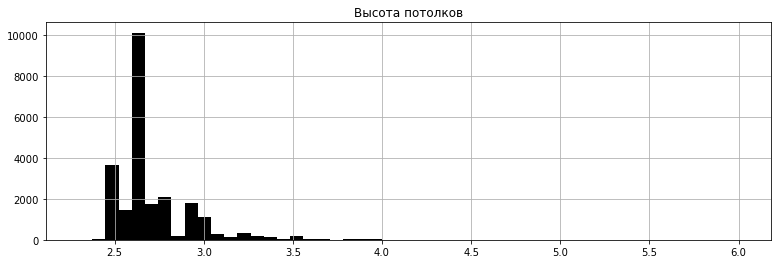

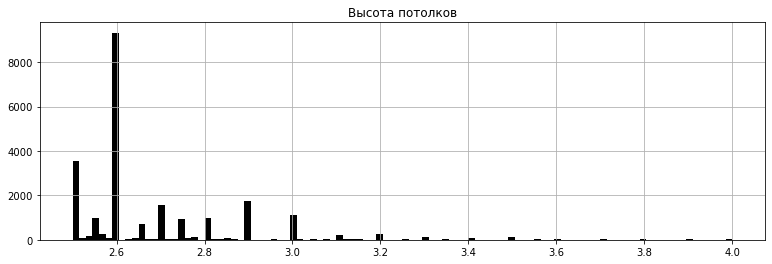

In [62]:
data['ceiling_height'].hist(figsize=(13,4),color='black',bins=50)
plt.title('Высота потолков')
plt.show()
data['ceiling_height'].hist(figsize=(13,4),color='black',bins=100,range = (2.5,4))
plt.title('Высота потолков')
plt.show()

<i>После удаления дефектов, видим что гистограмма площади потолков стремится к стандартизированным значениям, скорей всего это зависит от серии дома</i>

### Время продажи квартиры


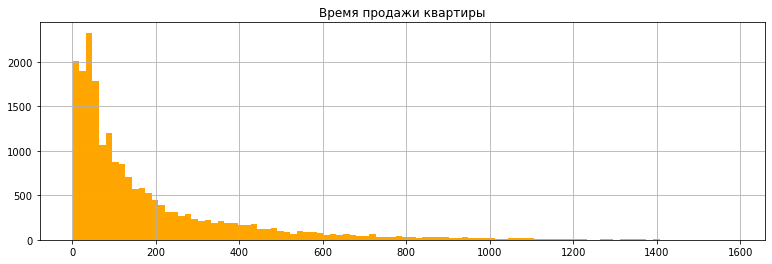

Среднее значение по времени продажи квартир, дни: 180.88863436982163
Медианное значение по времени продажи квартир, дни: 95.0


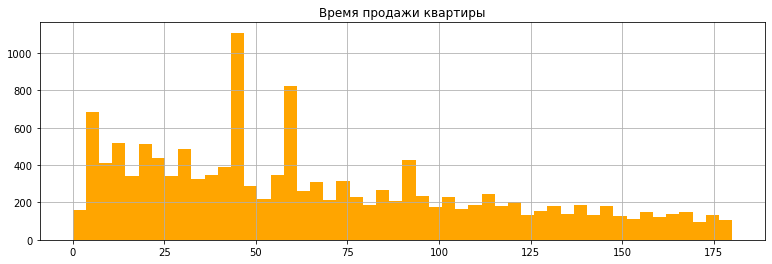

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


Text(0.5, 1.0, 'Диаграмма размаха времени продажи квартиры')

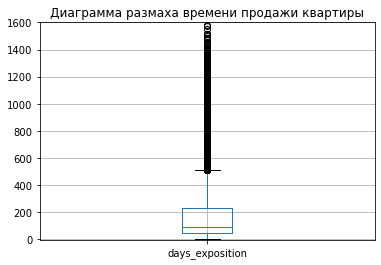

In [63]:
#Изучим время продажи квартиры
data['days_exposition'].hist(figsize=(13,4), color='orange',bins=100)
plt.title('Время продажи квартиры')
plt.show()
#Распределение похоже на экспоненциальное, что вроде бы естестественно?
print('Среднее значение по времени продажи квартир, дни:',data['days_exposition'].mean())
print('Медианное значение по времени продажи квартир, дни:',data['days_exposition'].median())
#Построим гистаграмму с другими параметрами
data['days_exposition'].hist(figsize=(13,4), color='orange',bins=50,range=(0,180))
plt.title('Время продажи квартиры')
plt.show()
#Ничего ошибочного не обнаружено
print(data['days_exposition'].describe())
#поставим минимальное значение по оси "-3" чтобы увидеть нижний ус
plt.ylim(-3, 1600)
data.boxplot(column='days_exposition')
plt.title('Диаграмма размаха времени продажи квартиры')

<i>Гистограма времени продажи квартир явных выбросов не содержит.<br>
Очнь долгое время продажи - то которое выходит за "усы, т.е. 4й квартиль
т.е. больше 232 дней, а быстрое ниже 1 квартиля, т.е. меньше 45 дней</i>

### Факторы влияния на стоимость квартиры


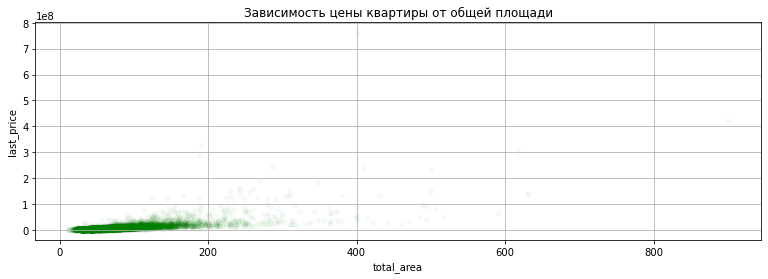

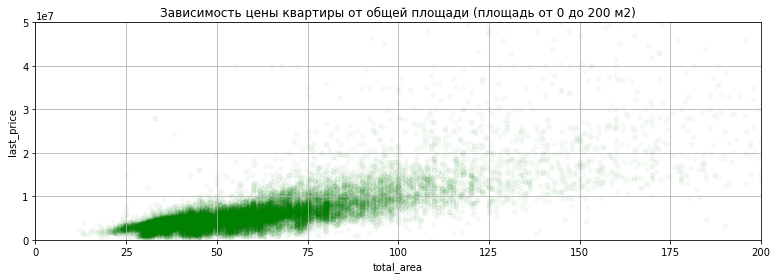

Коэффициент корреляции между площадью и общей ценой 0.687302205686975


In [64]:
#Какие факторы больше всего влияют на стоимость квартирые?
#Изучим зависит ли цена от площади?

data.plot( x='total_area',y='last_price',kind='scatter', alpha=0.03, grid = True, color='green',figsize=(13,4))
plt.title('Зависимость цены квартиры от общей площади')
plt.show()
#уменьшим пределы графика
data.plot( x='total_area',y='last_price',kind='scatter', alpha=0.03, grid = True, color='green',figsize=(13,4))
plt.xlim(0, 200)
plt.ylim(0, 50000000)
plt.title('Зависимость цены квартиры от общей площади (площадь от 0 до 200 м2)')
plt.show()
#Посмотрим коэффициент корреляции
data_help=data.loc[data['total_area']<130]
print('Коэффициент корреляции между площадью и общей ценой',data_help['total_area'].corr(data_help['last_price']))


<i>Видим что общая цена квартиры линейно увеличивается с увеличением площади</i>


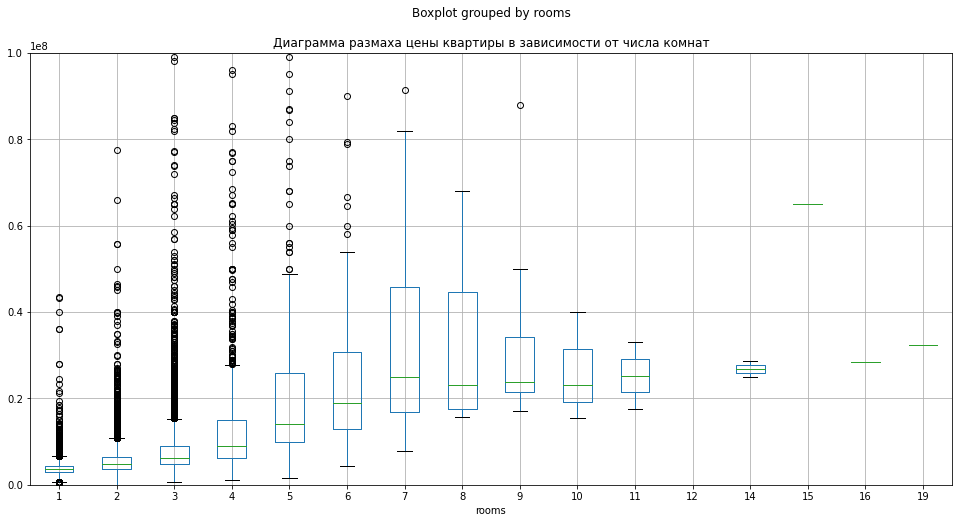

In [65]:
#Изучим зависит ли цена от числа комнат?
import numpy as np
import warnings
warnings.filterwarnings("ignore",category=np.VisibleDeprecationWarning)
data.boxplot(column='last_price', by = 'rooms', figsize = (16,8))
plt.ylim(0, 100000000)
plt.title('Диаграмма размаха цены квартиры в зависимости от числа комнат')
plt.show()

<i>Видим что с ростом числа комнат растет медиана цены, пока число комнат не равно 7. Дальше медиана примерно равна. Хотя у нас мало данных по квартирам счислом комнат 7 и более.</i>

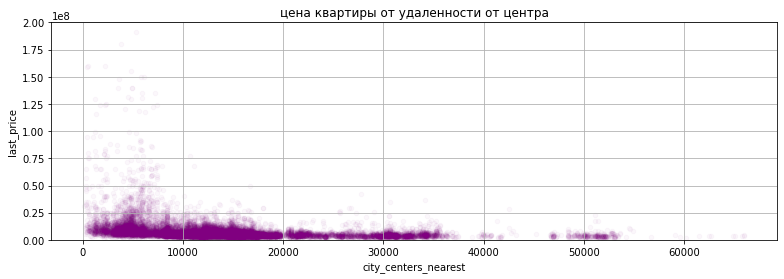

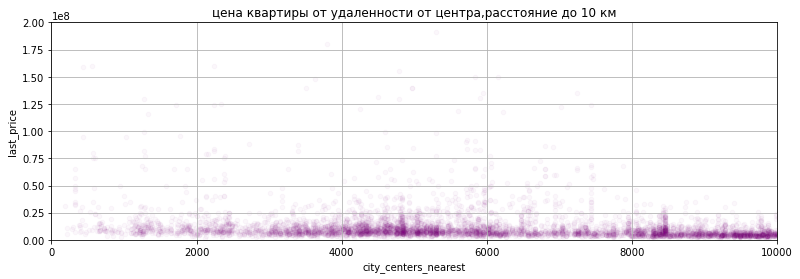

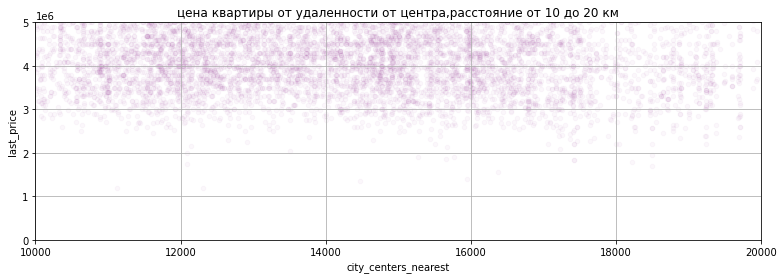

Коэффициент корреляции между площадью и общей ценой -0.20674734874298364


In [66]:
#Изучим зависит ли цена от удаленности от центра?
data.plot( x='city_centers_nearest',y='last_price',kind='scatter', alpha=0.03, grid = True, color='purple',figsize=(13,4))
plt.title('цена квартиры от удаленности от центра')
#plt.xlim(0, 100000000)
plt.ylim(0, 200000000)
plt.show()
#
data.plot( x='city_centers_nearest',y='last_price',kind='scatter', alpha=0.03, grid = True, color='purple',figsize=(13,4))
plt.title('цена квартиры от удаленности от центра,расстояние до 10 км')
plt.ylim(0, 200000000)
plt.xlim(0, 10000)
plt.show()
data.plot( x='city_centers_nearest',y='last_price',kind='scatter', alpha=0.03, grid = True, color='purple',figsize=(13,4))
plt.title('цена квартиры от удаленности от центра,расстояние от 10 до 20 км')
plt.ylim(0, 5000000)
plt.xlim(10000, 20000)
plt.show()
print('Коэффициент корреляции между площадью и общей ценой',data['city_centers_nearest'].corr(data['last_price']))

<i>До 10 км цена сильно влияет на удаленность от центра. Далее зависимость слабее. Причина - в Петербурге более важный фактор это близость к метро, чем к географическому центру</i>

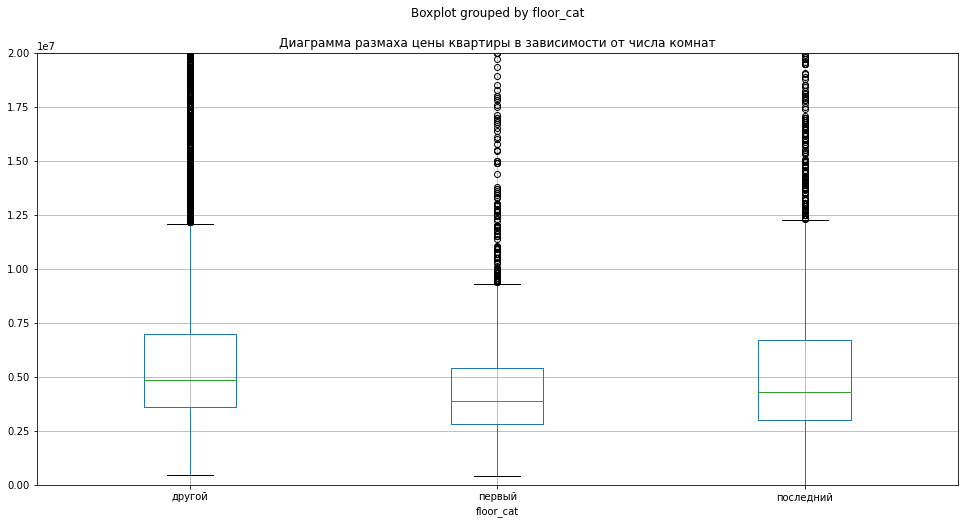

last_price
floor_cat            
другой      4850000.0
первый      3900000.0
последний   4300000.0

In [67]:
#Изучим распределение цены от того на каком этаже квартира
data.boxplot(column='last_price', by = 'floor_cat', figsize = (16,8))
plt.ylim(0, 20000000)
plt.title('Диаграмма размаха цены квартиры в зависимости от числа комнат')
plt.show()

data.pivot_table(index='floor_cat', values ='last_price',aggfunc='median')

<i>Видим что от этажа цена продажи завсим мало(медиана примерно равно), однаком зависимость есть.<br>
Для первого этажа - медианная цена продажи самая низкая, для последнего средняя, для другого - самая высокая
</i>

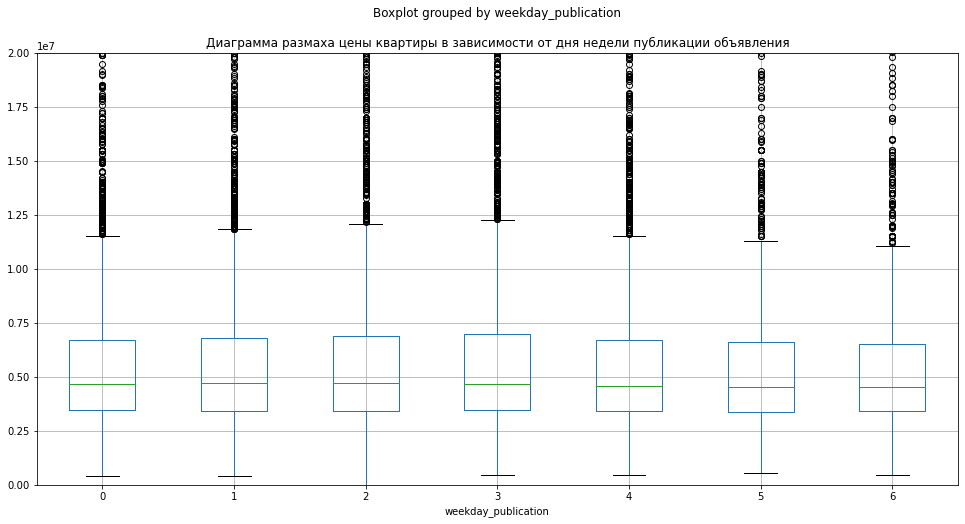

last_price
weekday_publication            
6                     4550000.0
5                     4555000.0
4                     4585000.0
0                     4650000.0
3                     4650000.0
2                     4700000.0
1                     4730000.0

last_price
count  7.000000e+00
mean   4.631429e+06
std    7.039853e+04
min    4.550000e+06
25%    4.570000e+06
50%    4.650000e+06
75%    4.675000e+06
max    4.730000e+06

In [68]:
#Изучим распределение цены от дня недели
data.boxplot(column='last_price', by = 'weekday_publication', figsize = (16,8))
plt.ylim(0, 20000000)
plt.title('Диаграмма размаха цены квартиры в зависимости от дня недели публикации объявления')
plt.show()
price_weekday=data.pivot_table(index='weekday_publication', values = 'last_price', aggfunc = 'median')
display(price_weekday.sort_values(by='last_price'))
price_weekday.describe()

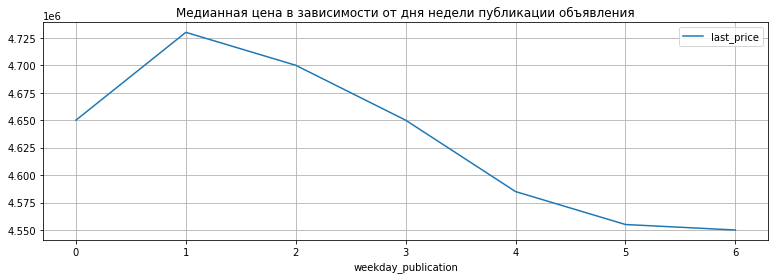

In [69]:
price_weekday.plot(grid=True, figsize = (13,4))
plt.title('Медианная цена в зависимости от дня недели публикации объявления')
#plt.xlim(2015, 2019)
#plt.ylim(4400000, 6000000)
plt.show()

<i>Медианное значение последней цены от дня недели зависит несильно-разница между максимальным и минимальным значением 200 000 рублей. Однако самая низкая цена для воскресенья, самая высокая для вторника.<br>
График показывает снижение цены в зависимости от дня недели, начиная со вторника</i>

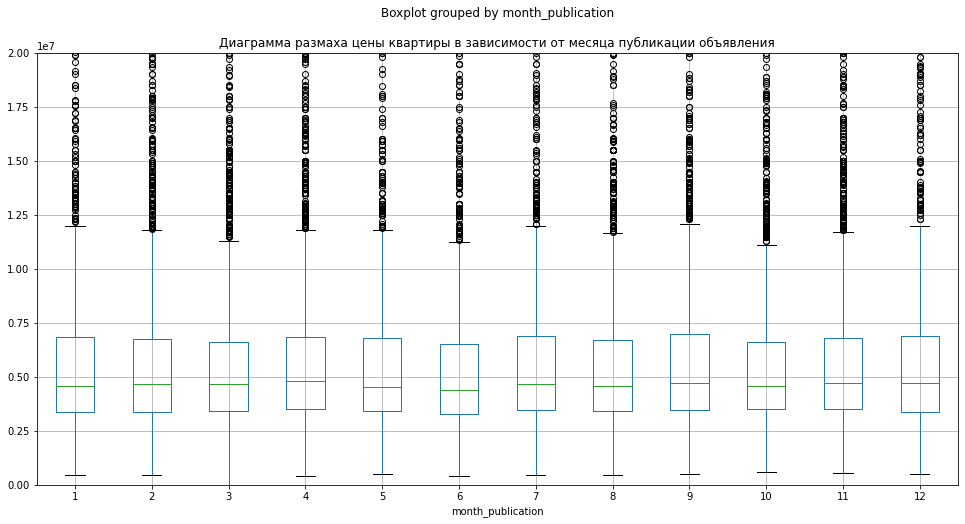

last_price
month_publication            
6                   4400000.0
5                   4515000.0
8                   4570000.0
10                  4570000.0
1                   4600000.0
2                   4650000.0
3                   4650000.0
7                   4650000.0
9                   4700000.0
11                  4700000.0
12                  4700000.0
4                   4800000.0

last_price
count  1.200000e+01
mean   4.625417e+06
std    1.039112e+05
min    4.400000e+06
25%    4.570000e+06
50%    4.650000e+06
75%    4.700000e+06
max    4.800000e+06

In [70]:
#Изучим распределение цены от месяца размещения
data.boxplot(column='last_price', by = 'month_publication', figsize = (16,8))
plt.ylim(0, 20000000)
plt.title('Диаграмма размаха цены квартиры в зависимости от месяца публикации объявления')
plt.show()
price_month=data.pivot_table(index='month_publication', values = 'last_price', aggfunc = 'median')
display(price_month.sort_values(by='last_price'))
price_month.describe()

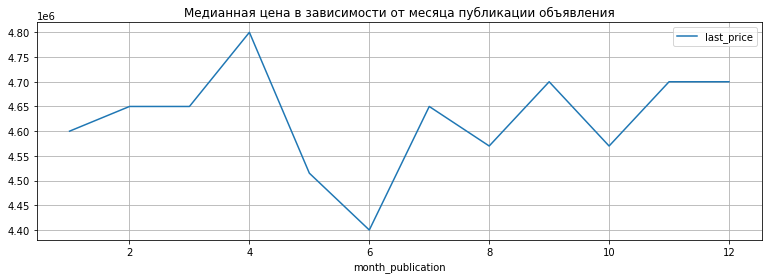

In [71]:
price_month.plot(grid=True, figsize = (13,4))
plt.title('Медианная цена в зависимости от месяца публикации объявления')
plt.show()

<i>Медианное значение последней цены от месяца размещения объявления зависит несильно-разница между максимальным и минимальным значением 400 000 рублей. Самая низкая цена для июня,мая и августа. Самая высокая для ноября, декабря и апреля.<br>
График достигает пика в апреле и дна в июне</i>

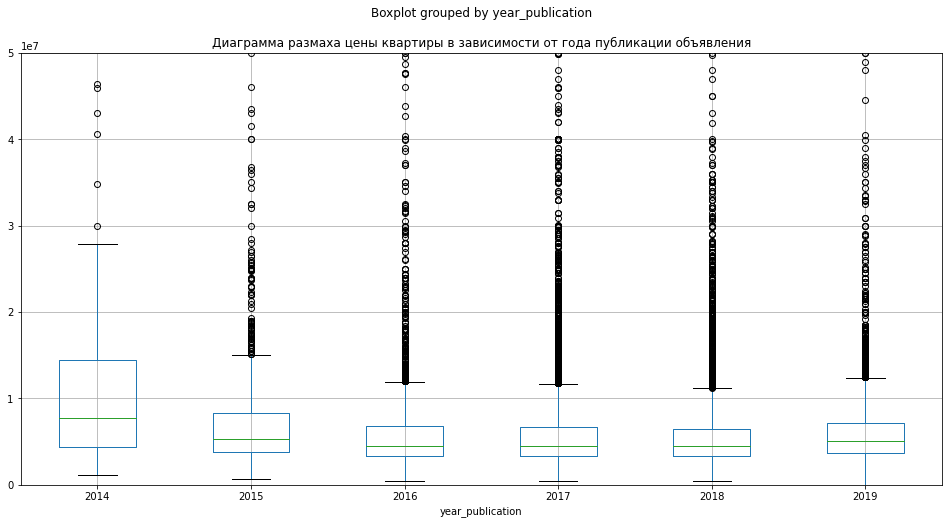

last_price
year_publication            
2017               4500000.0
2016               4550000.0
2018               4550000.0
2019               5050000.0
2015               5350000.0
2014               7700000.0

Количество объявлений 2014 года 137


In [72]:
#Изучим распределение цены от года размещения
data.boxplot(column='last_price', by = 'year_publication', figsize = (16,8))
plt.ylim(0, 50000000)
plt.title('Диаграмма размаха цены квартиры в зависимости от года публикации объявления')
plt.show()
price_year=data.pivot_table(index='year_publication', values = 'last_price', aggfunc = 'median')
display(price_year.sort_values(by='last_price'))
price_year.describe()
#price_year.sort_values(by='last_price').plot()
#Самое высокое значение для 2014 года. Похоже что у нас мало данных от 2014 года.
print('Количество объявлений 2014 года', data.loc[data['year_publication']==2014,'last_price'].count())
#Действительно, всего 135. Поэтому 2014 года на график выводить не будем


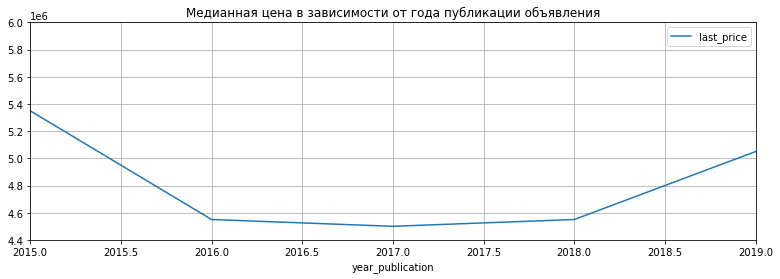

In [73]:
price_year.plot(grid=True, figsize = (13,4))
plt.title('Медианная цена в зависимости от года публикации объявления')
plt.xlim(2015, 2019)
plt.ylim(4400000, 6000000)
plt.show()

<i>График продаж достиг минимума в 2017, но стал стремиться ввысь в последующих годах. Видимо это тренд кризиса 2014 года и выхода из него </i>

### Населенные пункты с наибольшим числом объявлений

In [74]:
#Выберем 10 населенных пунктов с наибольшим числом предложений
#возьмем для сортировки любой параметр где нет пропусков, так как число строк у нас одинаковое. Пусть это будет число комнат
display(data.groupby('locality_name').count().sort_values(by='rooms',ascending=False).head(10))
#Санкт-Петербург, посёлок Мурино, посёлок Шушары, Всеволожск,Пушкин,Колпино,посёлок Парголово,Гатчина,деревня Кудрово,Выборг
#Создадим серию с названиями данных населенных пунктов
top_cities_names=pd.Series(['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары',
                      'Всеволожск','Пушкин','Колпино','посёлок Парголово',
                      'Гатчина','деревня Кудрово','Выборг'])
top_citites=data.query('locality_name in @top_cities_names').pivot_table(index='locality_name', values='m2_price', aggfunc=['mean'])
top_citites.columns = ['m2_price']
print('Населенный пункт с максимальной ценой м2 из Топ-10')
display(top_citites.loc[(top_citites['m2_price']==top_citites['m2_price'].max())])
print('Населенный пункт с минимальной ценой м2 из Топ-10')
display(top_citites.loc[(top_citites['m2_price']==top_citites['m2_price'].min())])
#Самый высокий - Санкт-Петербург
#Самый низкий - Выборг


total_images  last_price  total_area  first_day_exposition  \
locality_name                                                                   
Санкт-Петербург           15721       15721       15721                 15721   
посёлок Мурино              522         522         522                   522   
посёлок Шушары              440         440         440                   440   
Всеволожск                  398         398         398                   398   
Пушкин                      369         369         369                   369   
Колпино                     338         338         338                   338   
посёлок Парголово           327         327         327                   327   
Гатчина                     307         307         307                   307   
деревня Кудрово             299         299         299                   299   
Выборг                      237         237         237                   237   

                   rooms  ceiling_height  floors_total  living_area  floor  \
locality_name                                                                
Санкт-Петербург    15721           15721         15651        15721  15721   
посёлок Мурино       522             522           520          522    522   
посёлок Шушары       440             440           439          440    440   
Всеволожск           398             398           398          398    398   
Пушкин               369             369           369          369    369   
Колпино              338             338           338          338    338   
посёлок Парголово    327             327           327          327    327   
Гатчина              307             307           307          307    307   
деревня Кудрово      299             299           299          299    299   
Выборг               237             237           237          237    237   

                   studio  ...  ponds_around3000  ponds_nearest  \
locality_name              ...                                    
Санкт-Петербург     15721  ...             15660           7983   
посёлок Мурино        522  ...                 0              0   
посёлок Шушары        440  ...               436            152   
Всеволожск            398  ...                 0              0   
Пушкин                369  ...               369            177   
Колпино               338  ...               337            190   
посёлок Парголово     327  ...               327             56   
Гатчина               307  ...                 0              0   
деревня Кудрово       299  ...                 0              0   
Выборг                237  ...                 0              0   

                   days_exposition  liv_tot_ar_ratio  kitchen_tot_ar_ratio  \
locality_name                                                                
Санкт-Петербург              13638             15721                 15721   
посёлок Мурино                 517               522                   522   
посёлок Шушары                 408               440                   440   
Всеволожск                     339               398                   398   
Пушкин                         307               369                   369   
Колпино                        308               338                   338   
посёлок Парголово              302               327                   327   
Гатчина                        268               307                   307   
деревня Кудрово                299               299                   299   
Выборг                         208               237                   237   

                   m2_price  weekday_publication  month_publication  \
locality_name                                                         
Санкт-Петербург       15721                15721              15721   
посёлок Мурино          522                  522                522   
посёлок Шушары          440                  440                440   
Всеволожск  

Населенный пункт с максимальной ценой м2 из Топ-10


m2_price
locality_name                 
Санкт-Петербург  114849.005788

Населенный пункт с минимальной ценой м2 из Топ-10


m2_price
locality_name              
Выборг         58141.919831

<i>Населенный пункт с максимальной ценой за м2 из Топ-10 Санкт-Петербург - 114 849 руб/м2<br>
Населенный пункт с минимальной ценой за м2 из Топ-10 - Выборг-58 141 руб/м2</i>

### Квартиры в центре Санкт-Петербурга

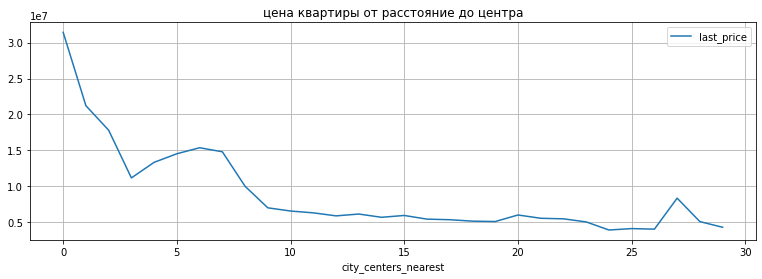

In [75]:
#Изучим предложение квартир, выясним какя область входит в центр
#сделаем срез данных, копию, чтобы не было сообщения от комплятора с ошибкой
data_spb_center=data.query('locality_name=="Санкт-Петербург"').copy()
#округлим до целых
data_spb_center['city_centers_nearest']=(data_spb_center['city_centers_nearest']/1000).round()
#data_spb_center['city_centers_nearest'].reset_index()
#выкинем пропущеннке значения расстояния до центра, так как они нам помешают в данном случае
data_spb_center.dropna(subset = ['city_centers_nearest'], inplace = True)
#проверим результат
#data_spb_center['city_centers_nearest'].isnull().mean()
#data_spb_center.info()
#нулевые значения удалились
#посчитаем среднее значение для каждого километра от центра
data_spb_center=data_spb_center.pivot_table(index='city_centers_nearest', values='last_price', aggfunc='mean')
data_spb_center.plot(grid = True,figsize=(13,4))
plt.title('цена квартиры от расстояние до центра')
plt.show()

<i>Видим что цена квартиры начинает сильн уходить вверх на участке около 3 км. Посмотрим поближе</i>

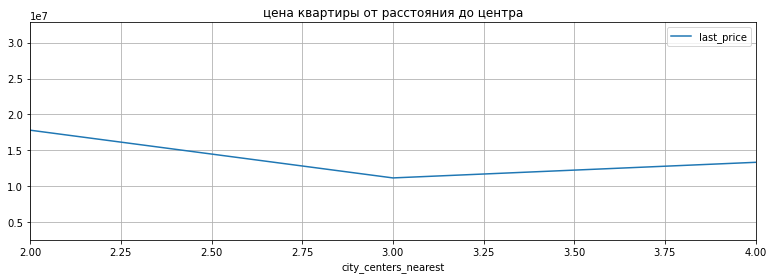

In [76]:
data_spb_center.plot(grid = True,figsize=(13,4))
plt.title('цена квартиры от расстояния до центра')
plt.xlim(2, 4)
plt.show()

<i>Это значение - 3 километра</i>

### Сегмент квартир в центре Санкт-Петербурга

In [77]:
#Выделим названный сегмент квартир в центре.
data_spb_center_top=data.query('locality_name=="Санкт-Петербург" and city_centers_nearest<3000').copy()
data_spb_center_top.describe()
#data_spb_center_top['city_centers_nearest']
#Видим этаж с 1го по 9й, медианный этаж 3
#Видим количество комнат от 0 до 14, причем медианное число комнат 3
#медианная цена 121 0000 за м2
#медианная площадь 87 м2
#высота потолков - медианная 3,2 м

total_images    last_price  total_area       rooms  ceiling_height  \
count    633.000000  6.330000e+02  633.000000  633.000000      633.000000   
mean      10.494471  1.817122e+07  102.261011    3.183254        3.106825   
std        6.408340  3.033816e+07   59.752579    1.506706        0.401719   
min        0.000000  2.100000e+06   12.000000    1.000000        2.500000   
25%        6.000000  7.590000e+06   65.000000    2.000000        2.900000   
50%       10.000000  1.010000e+07   87.000000    3.000000        3.000000   
75%       15.000000  1.580000e+07  120.500000    4.000000        3.330000   
max       50.000000  4.013000e+08  517.000000   14.000000        5.800000   

       floors_total  living_area       floor  kitchen_area     balcony  ...  \
count    633.000000   633.000000  633.000000    633.000000  633.000000  ...   
mean       4.864139    63.379078    3.099526     15.049426    0.116904  ...   
std        1.166730    40.543983    1.442314      9.698299    0.419744  ...   
min        2.000000     9.000000    1.000000      1.714286    0.000000  ...   
25%        4.000000    36.700000    2.000000      9.000000    0.000000  ...   
50%        5.000000    52.700000    3.000000     12.000000    0.000000  ...   
75%        6.000000    76.000000    4.000000     18.300000    0.000000  ...   
max        9.000000   332.000000    9.000000     87.200000    4.000000  ...   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
count     510.000000        633.000000     586.000000       520.000000   
mean      397.498039          2.175355     300.032423       259.200000   
std       193.972318          0.980454     236.116313       280.737356   
min        18.000000          0.000000      22.000000         3.000000   
25%       270.250000          1.000000      95.000000        63.000000   
50%       389.000000          3.000000     246.500000       148.500000   
75%       518.250000          3.000000     456.000000       378.000000   
max      1079.000000          3.000000    1002.000000      1572.000000   

       liv_tot_ar_ratio  kitchen_tot_ar_ratio      m2_price  \
count        633.000000            633.000000  6.330000e+02   
mean           0.611360              0.161595  1.597476e+05   
std            0.103959              0.083167  1.414773e+05   
min            0.208333              0.025381  2.892000e+04   
25%            0.548780              0.108989  9.834400e+04   
50%            0.614458              0.140515  1.211340e+05   
75%            0.684211              0.187500  1.575980e+05   
max            0.957746              0.559676  1.736842e+06   

       weekday_publication  month_publication  year_publication  
count           633.000000         633.000000        633.000000  
mean              2.635071           6.295419       2017.102686  
std               1.715852           3.542186          1.158571  
min               0.000000           1.000000       2014.000000  
25%               1.000000           3.000000       2016.000000  
50%               3.000000           6.000000       2017.000000  
75%               4.000000           9.000000       2018.000000  
max               6.000000          12.000000       2019.000000  

[8 rows x 23 columns]

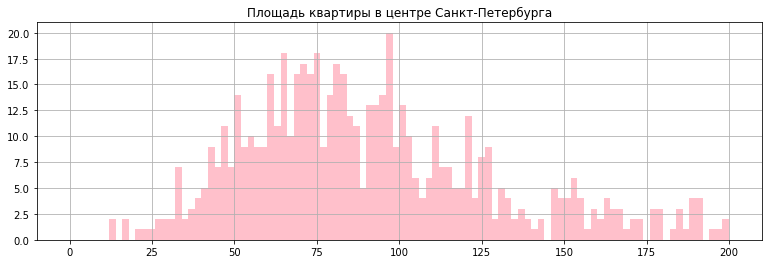

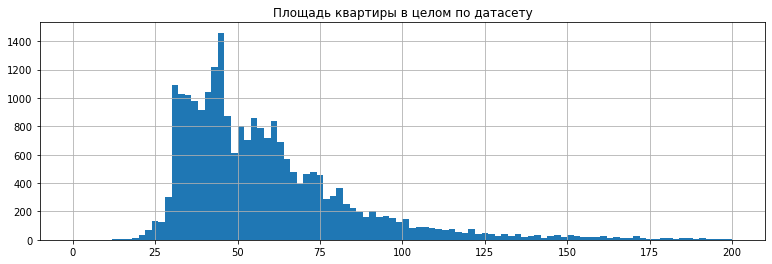

In [78]:
#построим гистограмму по площадти
data_spb_center_top['total_area'].hist(bins = 100,figsize=(13,4),color='Pink', range = (0,200))
plt.title('Площадь квартиры в центре Санкт-Петербурга')
plt.show()
#Сравним с гистограммой для общего датасета
data['total_area'].hist(bins = 100,figsize=(13,4), range = (0,200))
plt.title('Площадь квартиры в целом по датасету')
plt.show()
#data['total_area'].median()
#52 м2

<i>Площадь квартир в центре больше чем площади квартир в целом по датасету,медианное значение площади - 87 м2, тогда как больше всего квартир площадью  52 м2</i>

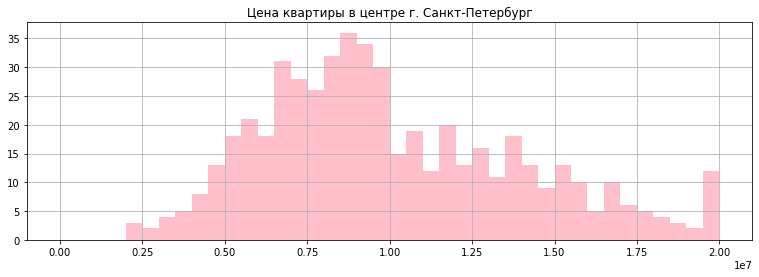

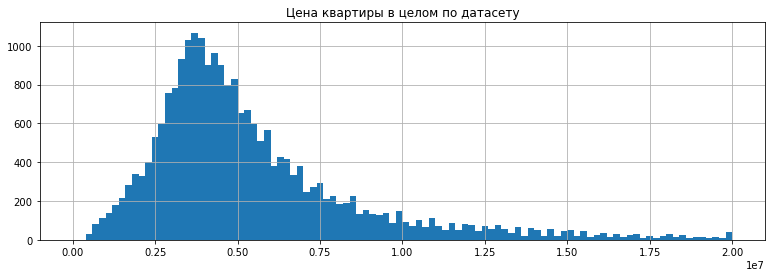

In [79]:
#Посмотрим цены на квартиры в центре
data_spb_center_top['last_price'].hist(bins = 40,figsize=(13,4),color='Pink',range = (0,20000000))
plt.title('Цена квартиры в центре г. Санкт-Петербург')
plt.show()
#Посмотрим цены на квартиры в целом
data['last_price'].hist(bins = 100,figsize=(13,4),range = (0,20000000)) #,range = (0,20000000)
plt.title('Цена квартиры в целом по датасету')
plt.show()

<i>График цен на квартиры имеют ту же логику, только максимум смещен вправо. Больше всего квартир с ценой от 7,5 до 10 миллионов, тогда как в целом по по датасету от 2,4 до 5 миллионов</i>

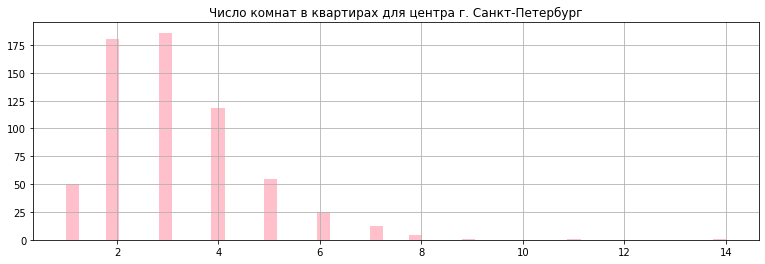

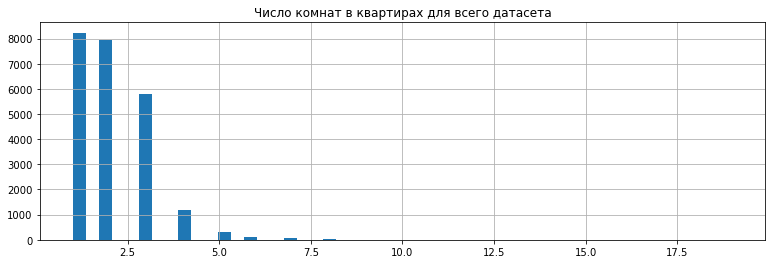

In [80]:
#построим гистограмму по числу комнат еще раз
data_spb_center_top['rooms'].hist(bins = 50,figsize=(13,4), color="pink")
plt.title('Число комнат в квартирах для центра г. Санкт-Петербург')
plt.show()
#построим гистограмму по числу комнат еще раз
data['rooms'].hist(bins = 50,figsize=(13,4))
plt.title('Число комнат в квартирах для всего датасета')
plt.show()

<i>Число комнат в квартирах в продаваемых квартирах в центре Санкт-Петербурга больше чем в целом по датасету. Больше всего квартир на продажу с числом комнат 3,2,4. В целом по датасету больше всего квартир на продажу с 1й комнатой</i>

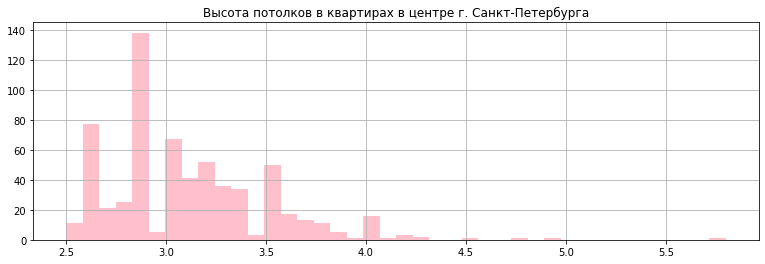

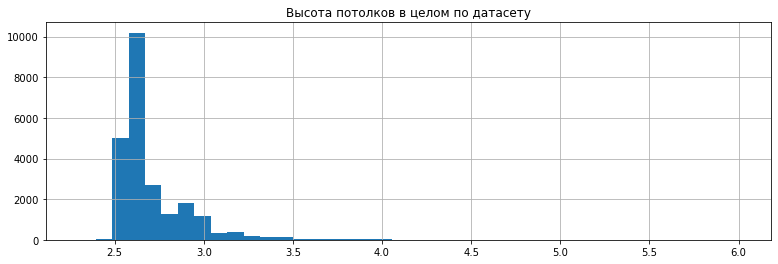

In [81]:
#Посмотрм высоту потолков
data_spb_center_top['ceiling_height'].hist(figsize=(13,4),color='pink',bins=40)
plt.title('Высота потолков в квартирах в центре г. Санкт-Петербурга')
plt.show()
data['ceiling_height'].hist(figsize=(13,4),bins=40)
plt.title('Высота потолков в целом по датасету')
plt.show()
#data['ceiling_height'].median()
#2.65

<i>Высота потолков не отличается от высоты потолков в целом по датасету, однако медиана больше у квартир в центре - 3,2 м против 2,65 м в целом по датасету</i>

(0.0, 50000000.0)

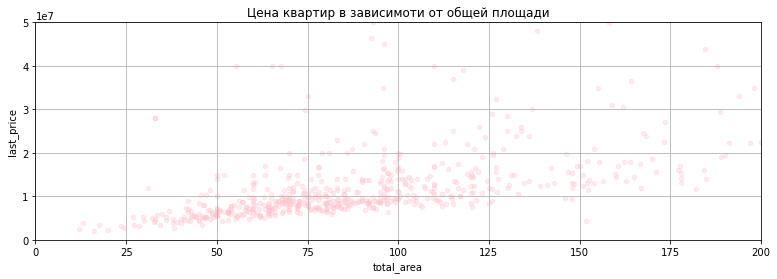

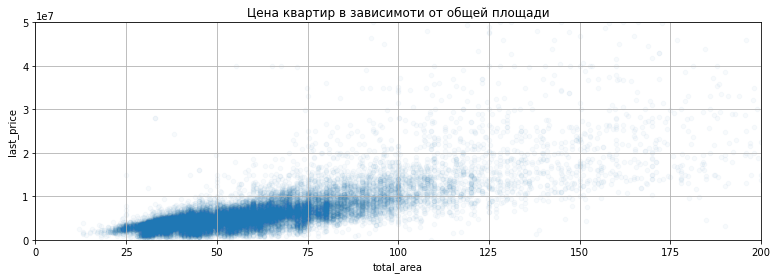

In [82]:
#Посмотрим цену квартир
data_spb_center_top.plot( x='total_area',y='last_price',kind='scatter', alpha=0.3, grid = True, color='pink',figsize=(13,4))
plt.title('Цена квартир в зависимоти от общей площади')
plt.xlim(0, 200)
plt.ylim(0, 50000000)
data.plot( x='total_area',y='last_price',kind='scatter', alpha=0.03, grid = True,figsize=(13,4))
plt.title('Цена квартир в зависимоти от общей площади')
plt.xlim(0, 200)
plt.ylim(0, 50000000)

<i>Цена квартир также зависит от площади, как в центре города так и в целом по датасету</i>

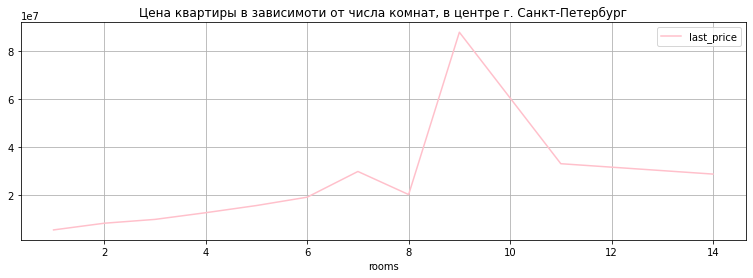

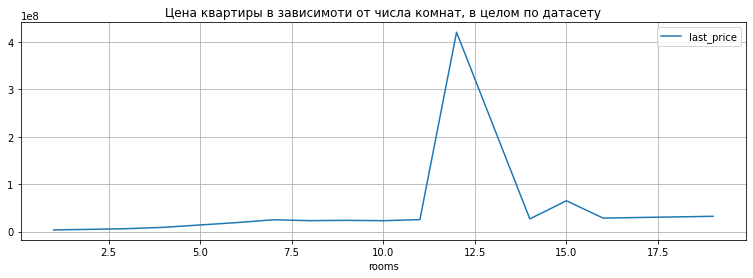

In [83]:
#Посмотрим факторы, которые влияют на стоимость квартиры
#Посмотрим комнаты
data_spb_center_top.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(grid = True,figsize=(13,4)
,color = 'pink')
plt.title('Цена квартиры в зависимоти от числа комнат, в центре г. Санкт-Петербург')
plt.show()
data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(grid = True,figsize=(13,4))
plt.title('Цена квартиры в зависимоти от числа комнат, в целом по датасету')
plt.show()

<i>Видим что с ростом числа комнат растет медиана цены, пока число комнат не равно 7. Дальше медиана примерно равна. Хотя у нас мало данных по квартирам счислом комнат 7 и более. Также как и для квартир в среднем по датасету</i>

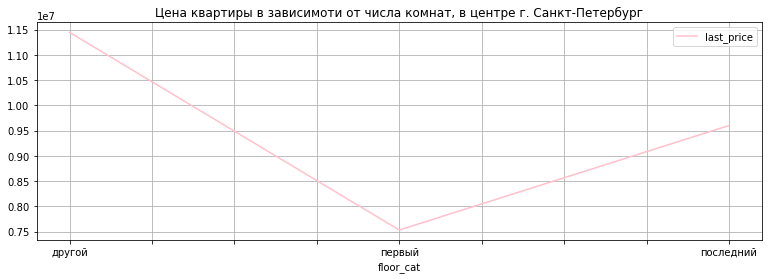

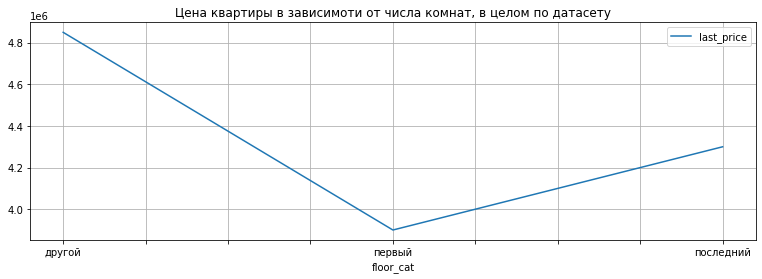

In [84]:
#Посмотрим на влияние этажа
data_spb_center_top.pivot_table(index='floor_cat', values='last_price', aggfunc='median').plot(grid = True,figsize=(13,4)
,color = 'pink')
plt.title('Цена квартиры в зависимоти от числа комнат, в центре г. Санкт-Петербург')
plt.show()
data.pivot_table(index='floor_cat', values='last_price', aggfunc='median').plot(grid = True,figsize=(13,4))
plt.title('Цена квартиры в зависимоти от числа комнат, в целом по датасету')
plt.show()

<i>Меньше всего медианная цена для 1го этажа, на втором месте последнего, другие этажи самые дорогие. Только цены все выше, чем в среднем по датасету. Зависимость величин одинакова, как в центре, так и в целом по датасету.</i>

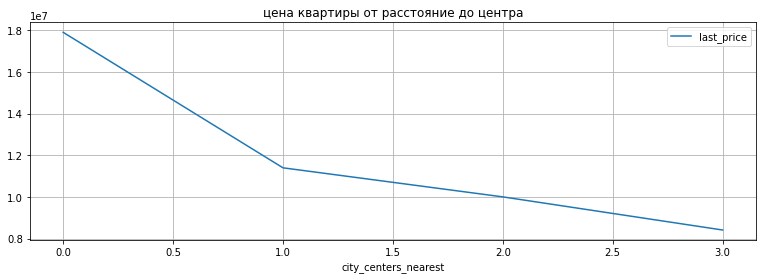

In [85]:
data_spb_center_top['city_centers_nearest']=(data_spb_center_top['city_centers_nearest']/1000).round()
#data_spb_center=data_spb_center.pivot_table(index='city_centers_nearest', values='last_price', aggfunc='mean')
data_spb_center_top.pivot_table(index='city_centers_nearest', values='last_price', aggfunc='median').plot(grid = True,figsize=(13,4))
plt.title('цена квартиры от расстояние до центра')
plt.show()
#data_spb_ce

<i>Близость к центру играет важную роль в цене квартиры для квартрир в центре тоже, зависимость линейная.Припреходе через границу в 1 км зависимость станосится более сильной</i>

last_price
month_publication            
7                   9200000.0
6                   9375000.0
2                   9500000.0
11                 10000000.0
9                  10150000.0
5                  10250000.0
8                  10395000.0
12                 10695000.0
3                  10900000.0
10                 11000000.0
4                  11400000.0
1                  11625000.0

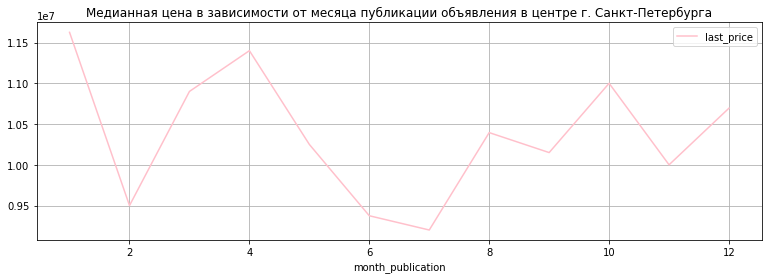

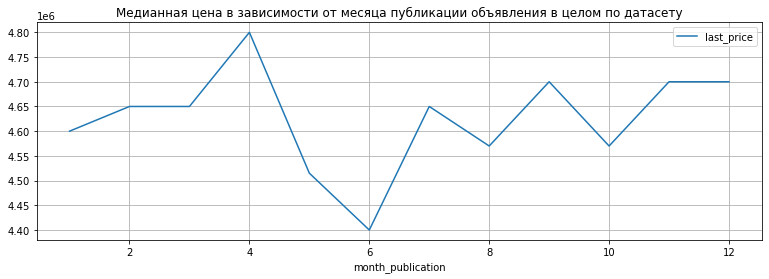

In [86]:
#Посмотрим на зависимость цены от месяца публикации
price_month_top=data_spb_center_top.pivot_table(index='month_publication', values = 'last_price', aggfunc = 'median')
display(price_month_top.sort_values(by='last_price'))
price_month.describe()
price_month_top.plot(grid=True, color = 'pink',figsize=(13,4))
plt.title('Медианная цена в зависимости от месяца публикации объявления в центре г. Санкт-Петербурга')
#plt.xlim(2015, 2019)
#plt.ylim(4400000, 6000000)
plt.show()
price_month.plot(grid=True,figsize=(13,4))
plt.title('Медианная цена в зависимости от месяца публикации объявления в целом по датасету')
#plt.xlim(2015, 2019)
#plt.ylim(4400000, 6000000)
plt.show()

<i>Минимальная цена в июле, максимальная в январе. В саомо графике логики не наблюдается, он больше похож на осцилограмму,в отличие от датасета в целом</i> 

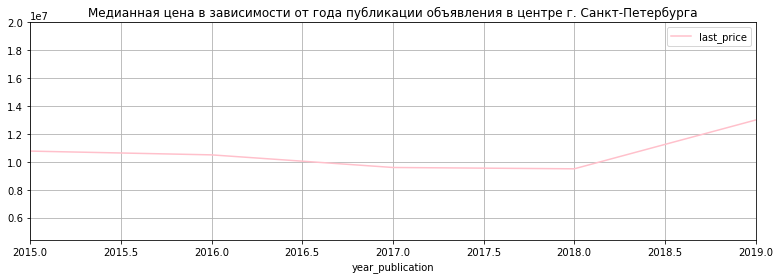

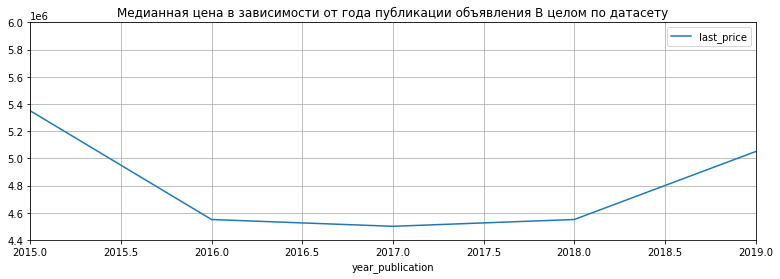

In [87]:
#Посмотрим на год публикации
price_year_top=data_spb_center_top.pivot_table(index='year_publication', values = 'last_price', aggfunc = 'median')
price_year_top.plot(grid=True, color='pink',figsize=(13,4))
plt.title('Медианная цена в зависимости от года публикации объявления в центре г. Санкт-Петербурга')
plt.xlim(2015, 2019)
plt.ylim(4400000, 20000000)
plt.show()
price_year.plot(grid=True,figsize=(13,4))
plt.title('Медианная цена в зависимости от года публикации объявления В целом по датасету')
plt.xlim(2015, 2019)
plt.ylim(4400000, 6000000)
plt.show()

<i>Цена покупки медленно снижалась до 2018 года, в 2019 пошла вверх и достигла нового максимума.<br>
По датасету в целом график похожий, но с дном в 2017 году</i>

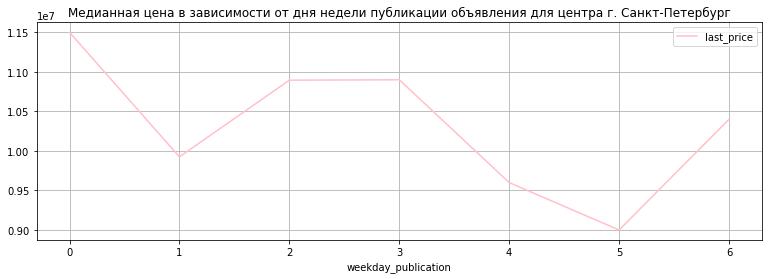

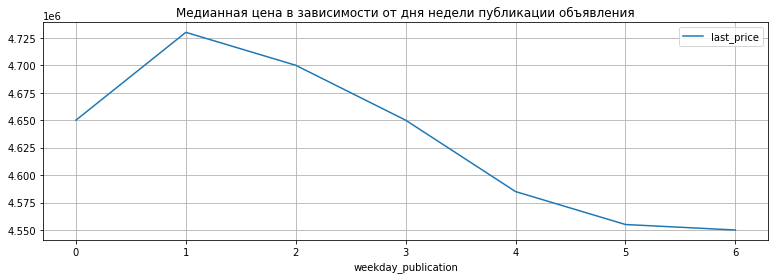

In [88]:
#Посмотрим на день недели размещения публикации
price_weekday_top=data_spb_center_top.pivot_table(index='weekday_publication', values = 'last_price', aggfunc = 'median')
#display(price_weekday_top.sort_values(by='last_price'))
#price_weekday.describe()
price_weekday_top.plot(grid=True,color = 'pink',figsize=(13,4))
plt.title('Медианная цена в зависимости от дня недели публикации объявления для центра г. Санкт-Петербург')
#plt.xlim(2015, 2019)
#plt.ylim(4400000, 6000000)
plt.show()
price_weekday.plot(grid=True,figsize=(13,4))
plt.title('Медианная цена в зависимости от дня недели публикации объявления')
#plt.xlim(2015, 2019)
#plt.ylim(4400000, 6000000)
plt.show()

<i>Максимум в понедельник, минимум в субботу. График в целом по датасету похож, но минимум в нем в воскресенье. </i>

In [89]:
#Выведем для Заказчика медианные значение основных параметров для центра г. Санкт-Петербурга и в целом по датасету и
print('Медианные значения основных параметров для центра г. Санкт-Петербурга:')
display(data_spb_center_top[[ 'last_price','m2_price', 'total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'kitchen_area', 'balcony','airports_nearest', 'city_centers_nearest', 'parks_around3000',
       'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']].describe().loc[['50%']])
print('Медианные значения основных параметров по датасету в целом:')
display(data[[ 'last_price','m2_price', 'total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'kitchen_area', 'balcony','airports_nearest', 'city_centers_nearest', 'parks_around3000',
       'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']].describe().loc[['50%']])

Медианные значения основных параметров для центра г. Санкт-Петербурга:


last_price  m2_price  total_area  rooms  ceiling_height  floors_total  \
50%  10100000.0  121134.0        87.0    3.0             3.0           5.0   

     living_area  floor  kitchen_area  balcony  airports_nearest  \
50%         52.7    3.0          12.0      0.0           21929.0   

     city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
50%                   2.0               2.0          389.0               3.0   

     ponds_nearest  days_exposition  
50%          246.5            148.5

Медианные значения основных параметров по датасету в целом:


last_price  m2_price  total_area  rooms  ceiling_height  floors_total  \
50%   4650000.0   95000.0        52.0    2.0             2.6           9.0   

     living_area  floor  kitchen_area  balcony  airports_nearest  \
50%         30.0    4.0      9.054545      0.0           26726.0   

     city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
50%               13098.5               0.0          455.0               1.0   

     ponds_nearest  days_exposition  
50%          502.0             95.0

В целом кваритры в центре Санкт-Петербурга обладают лучшими параметрами (высота потолков, числа комнат) чем кваритры в целом по датасету. Но логика зависимости величин та же.

## Общий вывод

В датасете были изучена зависимость цены квартир от различных факторов.<br>
Такие факторы как день недели, месяц публикации объвеления -слабо влияют на цену квартиры.
Общая площадь, удаленность от центра,сильнее.
Ранжируя исследуемые факторы, мы можем прогнозировать цену квартиры в зависимости от ее параметров, либо устанавливать, насколько реальна цена, заявленная продавцом, т.е. отслеживать мошеннические действия<br>
Рекомендуется дособрать картографические данные (расстояние до центра, до парков, пруда, аэропорта), и добавить расстояние до ближайшего метро, так как это более сильный фактор к стоимости квартиры в Санкт-Петербурге.<br>
